# Prediciting Produce Overview:

The backbone of any civilization is it's ability to properly feed it's population through sustained agriculture. climate change is a novel threat to humanity and we can only model a myraid of potetnional effects, never the less, I wanted to explore and generate a way for us to understand what climate change might mean for agriculture production, "Climate Change, not Climate death." so through the data I sought to answer:

-- What were Highest and Lowest Values in Agriculture Production over the last 28 years?

-- How does Air and Water Quality Influence Production over that time span?

-- Could we Predict future Production based on variance in these patterns?

# Business Problem: 

Farmers make up roughly 1% of the population and according to the USDA their median age is near 60, Despite the US in total representing 5% of the world's population it accounts for 15% of the world's agricultural suppiers for the world at large, with California accounting for 4% of that total. California, a land with increasingly extreme droughts and already with a burgeoning population, is home to some of the most profitable and fertile valleys in the world. 

With the advent of Robotic AI to offset the farmer population aging out it is important to implement technology not only in the labour but also in the generative aspect, i.e: choosing what to plant. 

Using this data and modeling we can graph and better predict changes in agriculture stemming from climate and prepare our farms to produce not only what has a higher yield but better survivability. 


# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import xgboost as xgb

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, \
AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report, plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.ticker as ticker
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import itertools
import numpy as np
from joblib import Parallel, delayed
from matplotlib.ticker import StrMethodFormatter


import warnings
warnings.filterwarnings('ignore')

# df_1: Water Chemical Composition 
# df_2: Air Particulates

-- Air Quality: https://shorturl.at/oxU02

-- Chemical Composition: https://www.nrcs.usda.gov/resources/data-and-reports/ssurgo/stats2go-metadata

In [2]:
#Chemical Makeup for Water Supplies
df_1 = pd.read_csv("Data/Water Chemical Makeup.csv")
#Air Particulate Measurements
df_2 = pd.read_csv('Data/Air Particulate.csv')

# df_3_year: Crop Production

-- Production: https://www.nass.usda.gov/Statistics_by_State/California/Publications/AgComm/index.php

In [3]:
#Production for 1990 to 2019
df_3_1990 = pd.read_csv('Data/1990.csv')
df_3_1991 = pd.read_csv('Data/1991.csv')
df_3_1992 = pd.read_csv('Data/1992.csv')
df_3_1993 = pd.read_csv('Data/1993.csv')
df_3_1994 = pd.read_csv('Data/1994.csv')
df_3_1995 = pd.read_csv('Data/1995.csv')
df_3_1996 = pd.read_csv('Data/1996.csv')
df_3_1997 = pd.read_csv('Data/1997.csv')
df_3_1998 = pd.read_csv('Data/1998.csv')
df_3_1999 = pd.read_csv('Data/1999.csv')
df_3_2000 = pd.read_csv('Data/2000.csv')
df_3_2001 = pd.read_csv('Data/2001.csv')
df_3_2002 = pd.read_csv('Data/2002.csv')
df_3_2003 = pd.read_csv('Data/2003.csv')
df_3_2004 = pd.read_csv('Data/2004.csv')
df_3_2005 = pd.read_csv('Data/2005.csv')
df_3_2006 = pd.read_csv('Data/2006.csv')
df_3_2007 = pd.read_csv('Data/2007.csv')
df_3_2008 = pd.read_csv('Data/2008.csv')
df_3_2009 = pd.read_csv('Data/2009.csv')
df_3_2010 = pd.read_csv('Data/2010.csv')
df_3_2011 = pd.read_csv('Data/2011.csv')
df_3_2012 = pd.read_csv('Data/2012.csv')
df_3_2013 = pd.read_csv('Data/2013.csv')
df_3_2014 = pd.read_csv('Data/2014.csv')
df_3_2015 = pd.read_csv('Data/2015.csv')
df_3_2016 = pd.read_csv('Data/2016.csv')
df_3_2017 = pd.read_csv('Data/2017.csv')
df_3_2018 = pd.read_csv('Data/2018.csv')
df_3_2019 = pd.read_csv('Data/2019.csv')

In [4]:
df_3_1998

,Year,Commodity Code,Crop Name,County Code,County,Harvested Acres,Yield,Production,Price P/U,Unit,Value
0,1998,268099,ALMOND HULLS,7,Butte,,,16725,64,TONS,1070000
1,1998,268099,ALMOND HULLS,11,Colusa,,,17500,70,TONS,1225000
2,1998,268099,ALMOND HULLS,19,Fresno,,,67800,77,TONS,5221000
3,1998,268099,ALMOND HULLS,21,Glenn,,,10151,80,TONS,812000
4,1998,268099,ALMOND HULLS,29,Kern,,,111000,70,TONS,7735000
...,...,...,...,...,...,...,...,...,...,...,...
2698,1998,472999,WOOL,101,Sutter,,,122532,0,LBS,49000
2699,1998,472999,WOOL,103,Tehama,,,49000,1,LBS,25000
2700,1998,472999,WOOL,115,Yuba,,,23598,0,LBS,10000
2701,1998,472999,WOOL,991,Sum of Others,,,,,,109600


# df_1: Water Qualities

In [5]:
df_1

,SITE_ID,SJV_REGION,EQ_AREA_CELL,LAT_DD,LONG_DD,COUNTY,SAMPLE_DATE,TDS,TDS_TYPE,CONDUCTIVITY,...,DTW_M,DTW_SOURCE,DBWT_M,TRIT_DATE,TRIT_2016_TU,TRIT_CAT,PCT_AG,PCT_NAT,PCT_URB,TDS_ION_MOD
0,373900120420001,NESJV-D,14,37.662972,-120.678472,CALAVERAS,3/28/2006,69,CALC,105,...,11.32,MODEL,75.54,3/28/2006,4.906,Mod,na,na,na,TDS
1,373100120350001,NESJV-D,13,37.517000,-120.588278,MERCED,4/6/2006,76,CALC,115,...,25.19,MODEL,77.22,4/6/2006,0.315,Mod,na,na,na,TDS
2,373100120260001,NESJV-D,16,37.522500,-120.434444,STANISLAUS,3/23/2006,109,CALC,164,...,25.91,MODEL,77.11,3/23/2006,2.328,Mod,na,na,na,TDS
3,374400120480001,NESJV-D,15,37.745917,-120.801861,STANISLAUS,5/3/2006,115,CALC,174,...,25.4,MODEL,159.31,5/3/2006,1.008,Mod,na,na,na,TDS
4,365042119493001,NESJV-D,21,36.844889,-119.824806,FRESNO,4/16/2008,129,LAB,na,...,25.31,MODEL,117.95,4/16/2008,2.612,Mod,na,na,na,ION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,364200120510001,WSJV,10,36.705028,-120.859806,FRESNO,4/13/2010,2289,LAB,na,...,13.74,MODEL,71.61,na,na,na,na,na,na,ION
718,372101120583503,WSJV,2,37.350215,-120.977428,STANISLAUS,3/29/2010,2304,LAB,na,...,4.48,MEASURED,0.7,na,na,na,na,na,na,ION
719,365800120510001,WSJV,8,36.980944,-120.864306,MERCED,6/29/2010,2752,LAB,na,...,31.32,MODEL,22.94,na,na,na,na,na,na,ION
720,361300119540001,WSJV,25,36.226778,-119.904833,KINGS,6/9/2010,2775,LAB,na,...,na,na,na,na,na,na,na,na,na,ION


In [6]:
#Examining Keys
df_1.keys()

Index(['SITE_ID', 'SJV_REGION', 'EQ_AREA_CELL', 'LAT_DD', 'LONG_DD', 'COUNTY',
       'SAMPLE_DATE', 'TDS', 'TDS_TYPE', 'CONDUCTIVITY', 'CA', 'MG', 'NA', 'K',
       'CL', 'SO4', 'NO3-N', 'SIO2', 'HCO3', 'WELL_DEPTH_M', 'DTW_M',
       'DTW_SOURCE', 'DBWT_M', 'TRIT_DATE', 'TRIT_2016_TU', 'TRIT_CAT',
       'PCT_AG', 'PCT_NAT', 'PCT_URB', 'TDS_ION_MOD'],
      dtype='object')

In [7]:
#Dropping irrelevant columns
columns_to_drop = ['WELL_DEPTH_M', 'TRIT_CAT', 'PCT_URB', 'PCT_NAT', 'PCT_AG',  'SITE_ID', 'LAT_DD', 'LONG_DD', 'SJV_REGION', 'EQ_AREA_CELL', 'TDS', 'TDS_TYPE', 'DTW_SOURCE', 'DBWT_M', 'TRIT_DATE', 'TDS_ION_MOD']
df_1 = df_1.drop(columns=columns_to_drop)
df_1 

,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
0,CALAVERAS,3/28/2006,105,na,na,na,na,na,na,na,na,na,11.32,4.906
1,MERCED,4/6/2006,115,na,na,na,na,na,na,na,na,na,25.19,0.315
2,STANISLAUS,3/23/2006,164,na,na,na,na,na,na,na,na,na,25.91,2.328
3,STANISLAUS,5/3/2006,174,na,na,na,na,na,na,na,na,na,25.4,1.008
4,FRESNO,4/16/2008,na,13.57,5.46,11.65,2.86,3.99,2.73,0.42,43.56,94.33,25.31,2.612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,FRESNO,4/13/2010,na,40.89,0.04,740.7,5.66,1350.47,5.33,0.04,65.56,40.02,13.74,na
718,STANISLAUS,3/29/2010,na,164.3,131.3,331.4,2.95,467.48,802.25,13.04,21.87,404.17,4.48,na
719,MERCED,6/29/2010,na,220.3,140.7,444.3,3.02,600.49,918.31,23.8,24.19,242.84,31.32,na
720,KINGS,6/9/2010,na,570.2,3.55,200.7,1.62,89.29,1732.7,0.27,12.28,13.06,na,na


In [8]:
# Replace 'na' strings with actual NaN values
df_1.replace('na', np.nan, inplace=True)

# Convert relevant columns to numeric
numeric_columns = ['CONDUCTIVITY', 'CA', 'MG', 'NA', 'K', 'CL', 'SO4', 'NO3-N', 'SIO2', 'HCO3', 'DTW_M', 'TRIT_2016_TU']
df_1[numeric_columns] = df_1[numeric_columns].apply(pd.to_numeric)

# Impute missing values with column means
df_1 = df_1.fillna(df_1.mean())

# Print the updated DataFrame
df_1


,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
0,CALAVERAS,3/28/2006,105.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,11.320000,4.906000
1,MERCED,4/6/2006,115.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.190000,0.315000
2,STANISLAUS,3/23/2006,164.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.910000,2.328000
3,STANISLAUS,5/3/2006,174.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.400000,1.008000
4,FRESNO,4/16/2008,622.275229,13.57000,5.460000,11.650000,2.860000,3.990000,2.730000,0.420000,43.560000,94.330000,25.310000,2.612000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,FRESNO,4/13/2010,622.275229,40.89000,0.040000,740.700000,5.660000,1350.470000,5.330000,0.040000,65.560000,40.020000,13.740000,2.154501
718,STANISLAUS,3/29/2010,622.275229,164.30000,131.300000,331.400000,2.950000,467.480000,802.250000,13.040000,21.870000,404.170000,4.480000,2.154501
719,MERCED,6/29/2010,622.275229,220.30000,140.700000,444.300000,3.020000,600.490000,918.310000,23.800000,24.190000,242.840000,31.320000,2.154501
720,KINGS,6/9/2010,622.275229,570.20000,3.550000,200.700000,1.620000,89.290000,1732.700000,0.270000,12.280000,13.060000,18.515855,2.154501


In [9]:
# Replace 'Na' with NaN
df_1.replace('na', np.nan, inplace=True)

# Drop rows with NaN values
df_1.dropna(inplace=True)
df_1

,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
0,CALAVERAS,3/28/2006,105.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,11.320000,4.906000
1,MERCED,4/6/2006,115.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.190000,0.315000
2,STANISLAUS,3/23/2006,164.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.910000,2.328000
3,STANISLAUS,5/3/2006,174.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.400000,1.008000
4,FRESNO,4/16/2008,622.275229,13.57000,5.460000,11.650000,2.860000,3.990000,2.730000,0.420000,43.560000,94.330000,25.310000,2.612000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,FRESNO,4/13/2010,622.275229,40.89000,0.040000,740.700000,5.660000,1350.470000,5.330000,0.040000,65.560000,40.020000,13.740000,2.154501
718,STANISLAUS,3/29/2010,622.275229,164.30000,131.300000,331.400000,2.950000,467.480000,802.250000,13.040000,21.870000,404.170000,4.480000,2.154501
719,MERCED,6/29/2010,622.275229,220.30000,140.700000,444.300000,3.020000,600.490000,918.310000,23.800000,24.190000,242.840000,31.320000,2.154501
720,KINGS,6/9/2010,622.275229,570.20000,3.550000,200.700000,1.620000,89.290000,1732.700000,0.270000,12.280000,13.060000,18.515855,2.154501


In [10]:
df_1['COUNTY'].value_counts()

FRESNO         152
TULARE         118
STANISLAUS     110
MERCED          95
SAN JOAQUIN     84
MADERA          61
KERN            55
KINGS           39
CALAVERAS        8
Name: COUNTY, dtype: int64

In [11]:
df_1

,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
0,CALAVERAS,3/28/2006,105.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,11.320000,4.906000
1,MERCED,4/6/2006,115.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.190000,0.315000
2,STANISLAUS,3/23/2006,164.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.910000,2.328000
3,STANISLAUS,5/3/2006,174.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.400000,1.008000
4,FRESNO,4/16/2008,622.275229,13.57000,5.460000,11.650000,2.860000,3.990000,2.730000,0.420000,43.560000,94.330000,25.310000,2.612000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,FRESNO,4/13/2010,622.275229,40.89000,0.040000,740.700000,5.660000,1350.470000,5.330000,0.040000,65.560000,40.020000,13.740000,2.154501
718,STANISLAUS,3/29/2010,622.275229,164.30000,131.300000,331.400000,2.950000,467.480000,802.250000,13.040000,21.870000,404.170000,4.480000,2.154501
719,MERCED,6/29/2010,622.275229,220.30000,140.700000,444.300000,3.020000,600.490000,918.310000,23.800000,24.190000,242.840000,31.320000,2.154501
720,KINGS,6/9/2010,622.275229,570.20000,3.550000,200.700000,1.620000,89.290000,1732.700000,0.270000,12.280000,13.060000,18.515855,2.154501


# Seperating df_1
## Tulare

In [12]:
#Searching for Tulare County info
county_name = 'TULARE'
df_1_Tulare = df_1.loc[df_1['COUNTY'] == county_name]

df_1_Tulare

,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
326,TULARE,10/31/2005,175.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,11.48,2.562
327,TULARE,12/7/2005,622.275229,1.22000,0.010000,42.350000,0.210000,6.910000,8.510000,0.430000,17.730000,54.870000,15.97,0.000
328,TULARE,4/27/2015,622.275229,2.56000,0.020000,50.960000,0.190000,8.610000,7.730000,0.040000,21.680000,68.410000,15.78,-0.066
329,TULARE,4/27/2015,622.275229,2.84000,0.110000,51.880000,0.220000,13.090000,7.460000,0.040000,22.090000,65.510000,19.38,-0.063
330,TULARE,3/5/2015,622.275229,10.24000,0.100000,37.880000,0.500000,10.570000,8.830000,6.690000,13.870000,62.320000,12.89,3.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,TULARE,2/26/2015,622.275229,150.90000,16.100000,63.730000,0.680000,39.790000,55.740000,33.060000,38.160000,423.140000,11.40,3.683
584,TULARE,3/3/2015,622.275229,86.74000,65.610000,160.400000,3.810000,79.270000,102.510000,29.320000,58.800000,605.070000,7.66,2.070
585,TULARE,4/23/2015,622.275229,145.40000,62.160000,56.090000,7.850000,89.540000,139.910000,23.050000,58.800000,422.210000,6.67,2.005
587,TULARE,7/21/2015,622.275229,94.05000,15.320000,207.600000,0.650000,65.350000,75.790000,34.380000,38.430000,539.900000,23.47,1.207


## Fresno

In [13]:
#Specfiying County I want
county_name = 'FRESNO'
df_1_Fresno = df_1.loc[df_1['COUNTY'] == county_name]

df_1_Fresno

,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
4,FRESNO,4/16/2008,622.275229,13.57000,5.460000,11.650000,2.860000,3.990000,2.730000,0.420000,43.560000,94.330000,25.31,2.612000
89,FRESNO,4/17/2008,622.275229,32.78000,3.290000,42.860000,4.360000,21.750000,22.460000,4.180000,29.520000,159.790000,16.92,1.105000
172,FRESNO,3/19/2014,622.275229,14.14000,1.990000,6.620000,1.770000,2.170000,5.780000,0.040000,52.680000,62.340000,12.31,2.914000
321,FRESNO,10/26/2005,123.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,8.27,4.300000
322,FRESNO,11/1/2005,145.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,18.44,2.546000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,FRESNO,4/12/2010,622.275229,214.50000,72.580000,207.000000,3.360000,123.920000,1077.800000,0.030000,32.010000,87.760000,1.46,2.154501
713,FRESNO,1/23/2012,622.275229,256.10000,93.880000,231.100000,2.340000,316.500000,923.140000,13.220000,33.040000,126.540000,1.98,2.154501
714,FRESNO,4/13/2010,622.275229,161.60000,114.000000,344.400000,5.780000,845.830000,508.700000,0.040000,20.920000,87.240000,1.62,2.154501
717,FRESNO,4/13/2010,622.275229,40.89000,0.040000,740.700000,5.660000,1350.470000,5.330000,0.040000,65.560000,40.020000,13.74,2.154501


## Stanislaus

In [14]:
#Specficying county I want
county_name = 'STANISLAUS'
df_1_Stan = df_1.loc[df_1['COUNTY'] == county_name]

df_1_Stan

,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
2,STANISLAUS,3/23/2006,164.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.91,2.328000
3,STANISLAUS,5/3/2006,174.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.40,1.008000
5,STANISLAUS,11/12/2003,622.275229,12.00000,3.950000,18.100000,4.830000,4.450000,0.170000,1.450000,63.650000,95.180000,12.25,0.010000
11,STANISLAUS,11/17/2003,622.275229,15.91000,5.330000,17.580000,5.390000,5.810000,5.690000,1.780000,62.410000,106.030000,13.46,2.154501
12,STANISLAUS,10/17/2002,622.275229,14.86000,4.790000,18.020000,4.940000,6.300000,2.620000,1.680000,64.020000,91.990000,14.71,2.154501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,STANISLAUS,10/22/2015,622.275229,73.72000,128.500000,124.900000,2.620000,303.660000,279.590000,17.660000,22.760000,306.210000,6.93,2.154501
705,STANISLAUS,4/15/2010,622.275229,168.50000,86.700000,99.610000,2.450000,163.580000,554.680000,20.040000,26.430000,94.920000,17.07,2.154501
715,STANISLAUS,3/29/2010,622.275229,127.20000,128.700000,321.000000,3.220000,428.700000,696.230000,1.570000,25.110000,477.660000,4.39,2.154501
716,STANISLAUS,3/18/2010,622.275229,157.90000,112.400000,313.800000,3.860000,429.380000,736.690000,2.600000,24.440000,397.850000,4.95,2.154501


# df_2: Air Particulate 

In [15]:
#Examining
df_2

,FIPSCode,LocationType,Location,TimeFrame,DataFormat,Data
0,0,Nation,United States,1999,Micrograms per Cubic Meter,N_A
1,0,Nation,United States,2000,Micrograms per Cubic Meter,13.5
2,0,Nation,United States,2001,Micrograms per Cubic Meter,13.2
3,0,Nation,United States,2002,Micrograms per Cubic Meter,12.8
4,0,Nation,United States,2003,Micrograms per Cubic Meter,12.3
...,...,...,...,...,...,...
1255,6005,County,Amador County,2003,Micrograms per Cubic Meter,N_A
1256,6005,County,Amador County,2002,Micrograms per Cubic Meter,N_A
1257,6005,County,Amador County,2000,Micrograms per Cubic Meter,N_A
1258,6005,County,Amador County,2001,Micrograms per Cubic Meter,N_A


In [16]:
#Drops irrelevant columns
columns_to_drop = ['FIPSCode', 'LocationType', 'DataFormat']
df_2 = df_2.drop(columns=columns_to_drop)
df_2

,Location,TimeFrame,Data
0,United States,1999,N_A
1,United States,2000,13.5
2,United States,2001,13.2
3,United States,2002,12.8
4,United States,2003,12.3
...,...,...,...
1255,Amador County,2003,N_A
1256,Amador County,2002,N_A
1257,Amador County,2000,N_A
1258,Amador County,2001,N_A


In [17]:
# Create a list of values to be removed from the 'County' column
values_to_remove_2 = ["United States", ' United States', 'United States ', ' United States ', 'California', ' California', 'California ']

# Remove the rows containing the specified values in the 'County' column
df_2 = df_2[~df_2['Location'].isin(values_to_remove_2)]
df_2

,Location,TimeFrame,Data
42,San Mateo County,1999,N_A
43,San Mateo County,2000,N_A
44,San Mateo County,2001,11.3
45,San Mateo County,2002,11.5
46,San Mateo County,2005,8.8
...,...,...,...
1255,Amador County,2003,N_A
1256,Amador County,2002,N_A
1257,Amador County,2000,N_A
1258,Amador County,2001,N_A


In [18]:
# Replace 'Na' with NaN
df_2.replace('N_A', np.nan, inplace=True)

# Drop rows with NaN values
df_2.dropna(inplace=True)
df_2

,Location,TimeFrame,Data
44,San Mateo County,2001,11.3
45,San Mateo County,2002,11.5
46,San Mateo County,2005,8.8
47,San Mateo County,2003,8.9
48,San Mateo County,2004,9.3
...,...,...,...
1234,Santa Cruz County,2016,5.3
1235,Santa Cruz County,2015,6.1
1236,Santa Cruz County,2017,7.1
1237,Santa Cruz County,2018,8.3


In [19]:
#Looking at location of tests
df_2['Location'].value_counts()

Stanislaus County         21
Placer County             21
San Luis Obispo County    21
Ventura County            21
Tulare County             21
Kern County               21
San Diego County          21
Santa Clara County        21
San Joaquin County        21
Fresno County             21
Imperial County           21
Calaveras County          20
Riverside County          20
Monterey County           20
Sonoma County             20
Alameda County            20
Los Angeles County        20
Sacramento County         20
Butte County              20
San Bernardino County     20
Sutter County             20
Shasta County             20
Solano County             20
Lake County               19
San Francisco County      19
San Mateo County          19
Merced County             19
Kings County              19
Contra Costa County       19
Santa Cruz County         18
Mendocino County          18
Santa Barbara County      18
Orange County             18
Nevada County             18
Yolo County   

# Final df_2 - Tulare 

In [20]:
county_name = 'Fresno County'
df_2_Fresno = df_2.loc[df_2['Location'] == county_name]

df_2_Fresno

,Location,TimeFrame,Data
945,Fresno County,2018,17.1
946,Fresno County,2019,11.2
947,Fresno County,2017,15.0
948,Fresno County,2015,15.0
949,Fresno County,2016,13.0
950,Fresno County,2012,15.4
951,Fresno County,2013,16.8
952,Fresno County,2014,16.6
953,Fresno County,2010,14.6
954,Fresno County,2011,17.9


In [21]:
county_name = 'Tulare County'
df_2_Tulare = df_2.loc[df_2['Location'] == county_name]

df_2_Tulare
#sacramento, sonoma, san bernadino, tulare, colusa

,Location,TimeFrame,Data
987,Tulare County,2017,16.3
988,Tulare County,2018,17.3
989,Tulare County,2019,12.9
990,Tulare County,2015,16.1
991,Tulare County,2016,14.7
992,Tulare County,2013,18.9
993,Tulare County,2014,17.9
994,Tulare County,2011,16.1
995,Tulare County,2012,14.8
996,Tulare County,2009,16.0


In [22]:
county_name = 'Stanislaus County'
df_2_Stan = df_2.loc[df_2['Location'] == county_name]

df_2_Stan

,Location,TimeFrame,Data
798,Stanislaus County,1999,24.9
799,Stanislaus County,2000,18.7
800,Stanislaus County,2001,15.6
801,Stanislaus County,2002,18.7
802,Stanislaus County,2004,13.6
803,Stanislaus County,2003,14.5
804,Stanislaus County,2007,15.0
805,Stanislaus County,2005,13.9
806,Stanislaus County,2006,14.8
807,Stanislaus County,2009,16.1


# Results of df_1 and df_2

A major part of this project is cross referncing df_1(Chemical Makeup) and df_2(Air Particulate) with df_3(Production Outputs). 
For that reason I have chosen to focus on the highest producing counties which are: 


Stanislaus: df_1_Stan, df_2_Stan - Apples

Fresno: df_1_Fresno, df_2_Fresno - Grapes

Tulare: df_1_Tulare, df_2_Tulare - Hay Alfalfa

# DF_3

In [23]:
#Examining
df_3_1990

,Year,Commodity Code,Crop Name,County Code,County,Harvested Acres,Yield,Production,Price P/U,Unit,Value
0,1990,172299,,21,Glenn,3991,0.15,607,1939,TONS,1177000
1,1990,172299,,999,State Totals,3991,0.15,607,1939,,1177000
2,1990,268099,ALMOND HULLS,7,Butte,,,42118,59,TONS,2485000
3,1990,268099,ALMOND HULLS,11,Colusa,,,12680,65,TONS,824000
4,1990,268099,ALMOND HULLS,19,Fresno,,,54400,70,TONS,3808000
...,...,...,...,...,...,...,...,...,...,...,...
2818,1990,472999,WOOL,103,Tehama,,,102000,1,LBS,73400
2819,1990,472999,WOOL,113,Yolo,,,192800,1,LBS,235000
2820,1990,472999,WOOL,115,Yuba,,,,,,28000
2821,1990,472999,WOOL,991,Sum of Others,,,,,,4100


In [24]:
df_3_1990[' County'].value_counts()

 State Totals       303
Sum of Others       204
Riverside           105
Fresno               93
Monterey             91
Stanislaus           79
Merced               74
Kern                 73
San Bernardino       72
San Joaquin          70
Sutter               70
Tulare               67
Santa Clara          66
Orange               61
San Diego            61
Kings                59
Santa Barbara        58
San Luis Obispo      54
Sacramento           53
Solano               49
Contra Costa         47
Yolo                 45
Madera               45
Imperial             45
Glenn                44
Tehama               42
San Benito           41
Butte                39
Siskiyou             38
Colusa               37
Sonoma               37
Ventura              36
Los Angeles          34
San Mateo            33
Lassen               33
Shasta               32
Placer               31
Humboldt             30
Santa Cruz           29
Yuba                 28
Lake                 26
El Dorado       

In [25]:
# Remove spaces in the 'Year' column of df_3_1996
df_3_1996['Year'] = df_3_1996['Year'].str.replace(' ', '')

In [26]:
#Standarize the naming convetion
df_3_1990 = df_3_1990.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})

df_3_1990.keys()

Index(['Year', 'Commodity Code', 'Crop Name', 'County Code', 'County',
       'Harvested Acres', 'Yield', 'Production', 'Price P/U', 'Unit', 'Value'],
      dtype='object')

In [27]:
#Standarize the naming convetion

def rename_columns(df):
    new_columns = {
        ' Price P/U': 'Price P/U',
        ' Production': 'Production',
        ' Yield': 'Yield',
        ' Harvested Acres': 'Harvested Acres',
        ' Commodity Code': 'Commodity Code',
        ' Crop Name': 'Crop Name',
        ' County Code': 'County Code',
        ' Unit': 'Unit',
        ' Value': 'Value',
        ' County': 'County'
    }
    
    return df.rename(columns=new_columns)

In [28]:
#Renaming and Standarizing df_3 entries

df_3_1990 = df_3_1990.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1991 = df_3_1991.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1992 = df_3_1992.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1993 = df_3_1993.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1994 = df_3_1994.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1995 = df_3_1995.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1996 = df_3_1996.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1997 = df_3_1997.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1998 = df_3_1998.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_1999 = df_3_1999.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2000 = df_3_2000.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2001 = df_3_2001.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2002 = df_3_2002.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2003 = df_3_2003.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2004 = df_3_2004.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2005 = df_3_2005.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2006 = df_3_2006.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2007 = df_3_2007.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2008 = df_3_2008.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2009 = df_3_2009.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2010 = df_3_2010.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2011 = df_3_2011.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2012 = df_3_2012.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2013 = df_3_2013.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2014 = df_3_2014.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2015 = df_3_2015.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2016 = df_3_2016.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2017 = df_3_2017.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2018 = df_3_2018.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})
df_3_2019 = df_3_2019.rename(columns={' Price P/U': 'Price P/U', ' Production': 'Production', ' Yield': 'Yield', ' Harvested Acres': 'Harvested Acres', ' Commodity Code': 'Commodity Code', ' Crop Name': 'Crop Name', ' County Code': 'County Code', ' Unit': 'Unit', ' Value': 'Value', ' County': 'County'})

In [29]:
#df_3_2002 has a different naming convention

df_3_2002 = df_3_2002.rename(columns={'year': 'Year', ' commodity': 'Commodity Code', ' cropname': 'Crop Name', ' countycode': 'County Code', ' county': 'County', ' acres': 'Harvested Acres', ' yield': 'Yield', ' production':'Production', ' price_per': 'Price P/U', ' unit': 'Unit', ' value': 'Value'})
df_3_2002

,Year,Commodity Code,Crop Name,County Code,County,Harvested Acres,Yield,Production,Price P/U,Unit,Value
0,2002,268099,ALMOND HULLS,7,Butte,,,39350,70,TON,2755000
1,2002,268099,ALMOND HULLS,11,Colusa,,,16190,60,TON,971000
2,2002,268099,ALMOND HULLS,19,Fresno,,,168000,85,TON,14280000
3,2002,268099,ALMOND HULLS,21,Glenn,,,,,,1761000
4,2002,268099,ALMOND HULLS,29,Kern,,,230000,66,TON,15136000
...,...,...,...,...,...,...,...,...,...,...,...
2309,2002,472999,WOOL,99,Stanislaus,,,16800,0.37,LBS,6200
2310,2002,472999,WOOL,101,Sutter,,,87780,0.18,LBS,15800
2311,2002,472999,WOOL,103,Tehama,,,35000,0.50,LBS,17500
2312,2002,472999,WOOL,115,Yuba,,,23117,0.26,LBS,6000


In [30]:
#Dropping irrelevant columns and adding together columns

def combine_and_drop_columns(df):
    # Specify the columns to be combined and dropped
    columns_to_combine = ['Year', 'Crop Name', 'County', 'Harvested Acres', 'Yield',
                          'Production', 'Unit', 'Value']
    columns_to_drop = ['Commodity Code', 'County Code', 'Price P/U']

    # Combine the specified columns
    combined_df = df[columns_to_combine]

    # Drop the specified columns if they exist in the dataframe
    columns_to_drop_existing = [col for col in columns_to_drop if col in combined_df.columns]
    final_df = combined_df.drop(columns=columns_to_drop_existing)

    return final_df

df_3_1990 = combine_and_drop_columns(df_3_1990)

In [31]:
df_3_1990 = combine_and_drop_columns(df_3_1990)
df_3_1991 = combine_and_drop_columns(df_3_1991)
df_3_1992 = combine_and_drop_columns(df_3_1992)
df_3_1993 = combine_and_drop_columns(df_3_1993)
df_3_1994 = combine_and_drop_columns(df_3_1994)
df_3_1995 = combine_and_drop_columns(df_3_1995)
df_3_1996 = combine_and_drop_columns(df_3_1996)
df_3_1997 = combine_and_drop_columns(df_3_1997)
df_3_1998 = combine_and_drop_columns(df_3_1998)
df_3_1999 = combine_and_drop_columns(df_3_1999)
df_3_2000 = combine_and_drop_columns(df_3_2000)
df_3_2001 = combine_and_drop_columns(df_3_2001)
df_3_2002 = combine_and_drop_columns(df_3_2002)
df_3_2003 = combine_and_drop_columns(df_3_2003)
df_3_2004 = combine_and_drop_columns(df_3_2004)
df_3_2005 = combine_and_drop_columns(df_3_2005)
df_3_2006 = combine_and_drop_columns(df_3_2006)
df_3_2007 = combine_and_drop_columns(df_3_2007)
df_3_2008 = combine_and_drop_columns(df_3_2008)
df_3_2009 = combine_and_drop_columns(df_3_2009)
df_3_2010 = combine_and_drop_columns(df_3_2010)
df_3_2011 = combine_and_drop_columns(df_3_2011)
df_3_2012 = combine_and_drop_columns(df_3_2012)
df_3_2013 = combine_and_drop_columns(df_3_2013)
df_3_2014 = combine_and_drop_columns(df_3_2014)
df_3_2015 = combine_and_drop_columns(df_3_2015)
df_3_2016 = combine_and_drop_columns(df_3_2016)
df_3_2017 = combine_and_drop_columns(df_3_2017)
df_3_2018 = combine_and_drop_columns(df_3_2018)
df_3_2019 = combine_and_drop_columns(df_3_2019)

In [32]:
#Found abbrevation in df_3_2015 - naming convention

df_3_2015

,Year,Crop Name,County,Harvested Acres,Yield,Production,Unit,Value
0,2015,ALMOND HULLS,Butte,NaN,NaN,40000.0,Tons,4800000
1,2015,ALMOND HULLS,Colusa,NaN,NaN,54400.0,Tons,4624000
2,2015,ALMOND HULLS,Fresno,NaN,NaN,348000.0,Tons,33930000
3,2015,ALMOND HULLS,Glenn,NaN,NaN,49100.0,Tons,3931000
4,2015,ALMOND HULLS,Kern,NaN,NaN,300000.0,Tons,33934000
...,...,...,...,...,...,...,...,...
2172,2015,WOOL,Stanislaus,NaN,NaN,34800.0,Lbs,175000
2173,2015,WOOL,Tehama,NaN,NaN,NaN,Lbs,68500
2174,2015,WOOL,Yuba,NaN,NaN,13000.0,Lbs,10000
2175,2015,WOOL,Sum of Others,NaN,NaN,511600.0,Lbs,935000


In [33]:
#Sample of the DF's 

df_3_2019 

,Year,Crop Name,County,Harvested Acres,Yield,Production,Unit,Value
0,2019,ALMOND HULLS,Butte,,,31000,Tons,2945000
1,2019,ALMOND HULLS,Colusa,,,68800,Tons,5844000
2,2019,ALMOND HULLS,Fresno,,,481000,Tons,50505000
3,2019,ALMOND HULLS,Glenn,,,58400,Tons,7648000
4,2019,ALMOND HULLS,Kern,,,384000,Tons,43489000
...,...,...,...,...,...,...,...,...
2101,2019,WOOL,Siskiyou,,,13600,Lbs,29800
2102,2019,WOOL,Solano,,,63500,Lbs,200000
2103,2019,WOOL,Stanislaus,,,39100,Lbs,60000
2104,2019,WOOL,Sum of Others,,,,,182000


In [34]:
#Combining New DataFrames
dfs = [df_3_1990, df_3_1991, df_3_1992, df_3_1993, df_3_1994, df_3_1995, df_3_1996, df_3_1997, df_3_1998, df_3_1999, df_3_2000, df_3_2001, df_3_2002, df_3_2003, df_3_2004, df_3_2005, df_3_2006, df_3_2007, df_3_2008, df_3_2009, df_3_2010, df_3_2011, df_3_2012, df_3_2013, df_3_2014, df_3_2015, df_3_2016, df_3_2017, df_3_2018, df_3_2019]

df_3_raw = pd.concat(dfs, ignore_index=True)


df_3_raw

,Year,Crop Name,County,Harvested Acres,Yield,Production,Unit,Value
0,1990,,Glenn,3991,0.15,607,TONS,1177000
1,1990,,State Totals,3991,0.15,607,,1177000
2,1990,ALMOND HULLS,Butte,,,42118,TONS,2485000
3,1990,ALMOND HULLS,Colusa,,,12680,TONS,824000
4,1990,ALMOND HULLS,Fresno,,,54400,TONS,3808000
...,...,...,...,...,...,...,...,...
73060,2019,WOOL,Siskiyou,,,13600,Lbs,29800
73061,2019,WOOL,Solano,,,63500,Lbs,200000
73062,2019,WOOL,Stanislaus,,,39100,Lbs,60000
73063,2019,WOOL,Sum of Others,,,,,182000


In [35]:
#Checking Values
df_3_raw['Crop Name'].value_counts

<bound method IndexOpsMixin.value_counts of 0                     
1                     
2        ALMOND HULLS 
3        ALMOND HULLS 
4        ALMOND HULLS 
             ...      
73060            WOOL 
73061            WOOL 
73062            WOOL 
73063            WOOL 
73064            WOOL 
Name: Crop Name, Length: 73065, dtype: object>

In [36]:
#Focusing on individusal crops

df_3_raw['Crop Name'].value_counts(normalize = True).head(30)

PASTURE RANGE                    0.019599
PASTURE IRRIGATED                0.018176
FRUITS & NUTS UNSPECIFIED        0.016903
VEGETABLES UNSPECIFIED           0.015794
CATTLE & CALVES UNSPECIFIED      0.014138
HAY ALFALFA                      0.013673
NURSERY PRODUCTS MISC.           0.013317
LIVESTOCK UNSPECIFIED            0.013071
SHEEP & LAMBS UNSPECIFIED        0.012674
FIELD CROPS UNSPECIFIED          0.012537
HAY GRAIN                        0.012331
GRAPES WINE                      0.012318
WALNUTS ENGLISH                  0.011072
WHEAT ALL                        0.010279
HOGS & PIGS UNSPECIFIED          0.009950
HAY OTHER UNSPECIFIED            0.009786
MILK MARKET FLUID                0.009539
WOOL                             0.009334
APIARY PRODUCTS HONEY            0.009320
LIVESTOCK PRODUCTS MISC.         0.008992
APPLES ALL                       0.008198
CHRISTMAS TREES & CUT GREENS     0.007952
NURSERY WOODY ORNAMNTALS         0.007363
APIARY PRODUCTS BEESWAX          0

In [37]:
#Examining 

df_3_raw['Crop Name'] 

0                     
1                     
2        ALMOND HULLS 
3        ALMOND HULLS 
4        ALMOND HULLS 
             ...      
73060            WOOL 
73061            WOOL 
73062            WOOL 
73063            WOOL 
73064            WOOL 
Name: Crop Name, Length: 73065, dtype: object

In [38]:
#Dropping further columns and NA's

columns_to_drop = ['Harvested Acres', 'Yield', 'Unit', 'Value']
df_3_raw = df_3_raw.drop(columns=columns_to_drop)
df_3_raw.dropna()

,Year,Crop Name,County,Production
0,1990,,Glenn,607
1,1990,,State Totals,607
2,1990,ALMOND HULLS,Butte,42118
3,1990,ALMOND HULLS,Colusa,12680
4,1990,ALMOND HULLS,Fresno,54400
...,...,...,...,...
73060,2019,WOOL,Siskiyou,13600
73061,2019,WOOL,Solano,63500
73062,2019,WOOL,Stanislaus,39100
73063,2019,WOOL,Sum of Others,


In [39]:
#Cleaning Dataframe from Drop Na's and Zeros
def drop_na_zeros(df):
    # Drop rows with NaN values in any column
    df = df.dropna()
    
    # Drop rows with empty strings or spaces in the 'Crop Name' column
    df = df[df['Crop Name'].str.strip() != '']
    
    # Drop rows with '0' or 0 values in any column
    df = df[(df != 0).all(axis=1)]
    
    return df

# Call the function with df_3_raw DataFrame
cleaned_df = drop_na_zeros(df_3_raw)

# Print the cleaned DataFrame
print(cleaned_df)

       Year      Crop Name          County Production
2      1990  ALMOND HULLS           Butte      42118 
3      1990  ALMOND HULLS          Colusa      12680 
4      1990  ALMOND HULLS          Fresno      54400 
5      1990  ALMOND HULLS           Glenn      12276 
6      1990  ALMOND HULLS            Kern     139000 
...     ...            ...             ...        ...
73060  2019          WOOL        Siskiyou       13600
73061  2019          WOOL          Solano       63500
73062  2019          WOOL      Stanislaus       39100
73063  2019          WOOL   Sum of Others            
73064  2019          WOOL     State Totals    1059140

[69417 rows x 4 columns]


In [40]:
#Stripping space from County name
cleaned_df['County'] = cleaned_df['County'].map(lambda x: x.rstrip())

In [41]:
#Traced over DF and created strips to remove spaces in the crop name columns

cleaned_df['Crop Name'] = cleaned_df['Crop Name'].map(lambda x: x.rstrip())
cleaned_df['Crop Name'].value_counts().head(20)

PASTURE RANGE                  1430
PASTURE IRRIGATED              1327
FRUITS & NUTS UNSPECIFIED      1176
HAY ALFALFA                    1141
VEGETABLES UNSPECIFIED         1135
GRAPES WINE                    1044
CATTLE & CALVES UNSPECIFIED    1032
HAY GRAIN                      1023
NURSERY PRODUCTS MISC.          972
LIVESTOCK UNSPECIFIED           954
SHEEP & LAMBS UNSPECIFIED       925
WALNUTS ENGLISH                 921
FIELD CROPS UNSPECIFIED         899
WHEAT ALL                       849
HAY OTHER UNSPECIFIED           813
MILK MARKET FLUID               788
APIARY PRODUCTS HONEY           766
WOOL                            758
HOGS & PIGS UNSPECIFIED         726
LIVESTOCK PRODUCTS MISC.        656
Name: Crop Name, dtype: int64

In [42]:
#With final cleaned_df checking county values to look into highest producing

cleaned_df['County'].value_counts(normalize=True).head(30)

 State Totals      0.106876
Sum of Others      0.077171
Monterey           0.036763
Fresno             0.036576
Riverside          0.034084
Kern               0.029085
Tulare             0.027731
Stanislaus         0.027428
San Joaquin        0.026881
Merced             0.026492
San Diego          0.023971
San Bernardino     0.023524
Kings              0.021292
Sutter             0.020643
Santa Clara        0.019909
Ventura            0.019865
Imperial           0.018972
Glenn              0.017618
Madera             0.017301
Sacramento         0.017287
Santa Barbara      0.017056
Solano             0.016610
San Luis Obispo    0.016336
Contra Costa       0.014723
San Benito         0.014694
Tehama             0.014564
Colusa             0.014334
Yolo               0.013527
Orange             0.013455
San Mateo          0.013325
Name: County, dtype: float64

In [43]:
#Inspecting 

cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69417 entries, 2 to 73064
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        69417 non-null  object
 1   Crop Name   69417 non-null  object
 2   County      69417 non-null  object
 3   Production  69417 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


In [44]:
#Converting Production from Objection to Intergers
def convert_to_int(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df[column] = df[column].astype('Int64')
    return df

cleaned_df = convert_to_int(cleaned_df, 'Production')
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69417 entries, 2 to 73064
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        69417 non-null  object
 1   Crop Name   69417 non-null  object
 2   County      69417 non-null  object
 3   Production  46070 non-null  Int64 
dtypes: Int64(1), object(3)
memory usage: 2.7+ MB


In [45]:
#Removing 0's and spaces from Production Column
cleaned_df = cleaned_df[(cleaned_df['Production'] != 0) & (cleaned_df['Production'].astype(str).str.strip() != '')]
cleaned_df

,Year,Crop Name,County,Production
2,1990,ALMOND HULLS,Butte,42118
3,1990,ALMOND HULLS,Colusa,12680
4,1990,ALMOND HULLS,Fresno,54400
5,1990,ALMOND HULLS,Glenn,12276
6,1990,ALMOND HULLS,Kern,139000
...,...,...,...,...
73059,2019,WOOL,Sierra,1010
73060,2019,WOOL,Siskiyou,13600
73061,2019,WOOL,Solano,63500
73062,2019,WOOL,Stanislaus,39100


In [46]:
# Create a list of values to be removed from the 'County' column
values_to_remove = [" State Totals", "Sum of Others", " State Totals ", "State Totals ", "Sum of Others ", " Sum of Others"]

# Remove the rows containing the specified values in the 'County' column
cleaned_df = cleaned_df[~cleaned_df['County'].isin(values_to_remove)]
cleaned_df

,Year,Crop Name,County,Production
2,1990,ALMOND HULLS,Butte,42118
3,1990,ALMOND HULLS,Colusa,12680
4,1990,ALMOND HULLS,Fresno,54400
5,1990,ALMOND HULLS,Glenn,12276
6,1990,ALMOND HULLS,Kern,139000
...,...,...,...,...
73058,2019,WOOL,San Joaquin,67000
73059,2019,WOOL,Sierra,1010
73060,2019,WOOL,Siskiyou,13600
73061,2019,WOOL,Solano,63500


In [47]:
#Production values need to be float to go into Time Series
cleaned_df['Production'] = cleaned_df['Production'].astype(float)

# Seperating Grapes

In [48]:
#Examining to Seperate
cleaned_df

,Year,Crop Name,County,Production
2,1990,ALMOND HULLS,Butte,42118.0
3,1990,ALMOND HULLS,Colusa,12680.0
4,1990,ALMOND HULLS,Fresno,54400.0
5,1990,ALMOND HULLS,Glenn,12276.0
6,1990,ALMOND HULLS,Kern,139000.0
...,...,...,...,...
73058,2019,WOOL,San Joaquin,67000.0
73059,2019,WOOL,Sierra,1010.0
73060,2019,WOOL,Siskiyou,13600.0
73061,2019,WOOL,Solano,63500.0


In [49]:
df_3_2014.keys()

Index(['Year', 'Crop Name', 'County', 'Harvested Acres', 'Yield', 'Production',
       'Unit', 'Value'],
      dtype='object')

In [50]:
#Creating a DF with just the Crop and County I want

crop_name = 'HAY ALFALFA'
crop_rows = cleaned_df.loc[cleaned_df['Crop Name'] == crop_name]

county_name = 'Tulare'
crop_rows_2 = crop_rows.loc[crop_rows['County'] == county_name]
crop_rows_2
#Fresno and Tulare and Sonoma

,Year,Crop Name,County,Production
1280,1990,HAY ALFALFA,Tulare,945000.0
4025,1991,HAY ALFALFA,Tulare,824000.0
6785,1992,HAY ALFALFA,Tulare,702000.0
9600,1993,HAY ALFALFA,Tulare,625000.0
12381,1994,HAY ALFALFA,Tulare,748000.0
15086,1995,HAY ALFALFA,Tulare,585000.0
17783,1996,HAY ALFALFA,Tulare,701000.0
20490,1997,HAY ALFALFA,Tulare,784000.0
23186,1998,HAY ALFALFA,Tulare,780000.0
25871,1999,HAY ALFALFA,Tulare,893000.0


In [51]:
# Group the data by 'Crop Name' and 'Year' and sum the 'Production' values
combined_df = cleaned_df.groupby(['Crop Name', 'Year', 'County'])['Production'].sum().reset_index()

# Filter for 'GRAPES WINE' entries
grapes_wine_df = combined_df[combined_df['Crop Name'] == 'GRAPES WINE']

grapes_wine_df

,Crop Name,Year,County,Production
14266,GRAPES WINE,1990,Alameda,3435.0
14267,GRAPES WINE,1990,Amador,5643.0
14268,GRAPES WINE,1990,Calaveras,360.0
14269,GRAPES WINE,1990,Fresno,346750.0
14270,GRAPES WINE,1990,Kern,251000.0
...,...,...,...,...
15226,GRAPES WINE,1996,Solano,13312.0
15227,GRAPES WINE,1996,Sonoma,127990.0
15228,GRAPES WINE,1996,Stanislaus,114900.0
15229,GRAPES WINE,1996,Tulare,256840.0


## Fresno

In [52]:
#Creating a DF with just the country and crop I want
counties = ['Fresno', ' Fresno', 'Fresno ']
grapes_wine_df = cleaned_df[cleaned_df['Crop Name'] == 'GRAPES WINE']
fres_grapes = grapes_wine_df[grapes_wine_df['County'].isin(counties)]
fres_grapes

,Year,Crop Name,County,Production
1209,1990,GRAPES WINE,Fresno,346750.0
3955,1991,GRAPES WINE,Fresno,304780.0
6714,1992,GRAPES WINE,Fresno,825100.0
9531,1993,GRAPES WINE,Fresno,667100.0
12309,1994,GRAPES WINE,Fresno,395800.0
15017,1995,GRAPES WINE,Fresno,643400.0
17714,1996,GRAPES WINE,Fresno,737490.0
20419,1997,GRAPES WINE,Fresno,978930.0
23112,1998,GRAPES WINE,Fresno,760130.0
25801,1999,GRAPES WINE,Fresno,693910.0


## Merced

In [53]:
#Creating a DF with just the country and crop I want
counties = ['Merced', ' Merced', 'Merced ']
grapes_wine_df = cleaned_df[cleaned_df['Crop Name'] == 'GRAPES WINE']
mer_grapes = grapes_wine_df[grapes_wine_df['County'].isin(counties)]
mer_grapes

,Year,Crop Name,County,Production
1216,1990,GRAPES WINE,Merced,122900.0
3962,1991,GRAPES WINE,Merced,108389.0
6721,1992,GRAPES WINE,Merced,108000.0
9538,1993,GRAPES WINE,Merced,116940.0
12316,1994,GRAPES WINE,Merced,113580.0
15024,1995,GRAPES WINE,Merced,92151.0
17721,1996,GRAPES WINE,Merced,78725.0
20426,1997,GRAPES WINE,Merced,131857.0
23119,1998,GRAPES WINE,Merced,88283.0
25809,1999,GRAPES WINE,Merced,104938.0


## San Joaquin

In [54]:
#Creating a DF with just the country and crop I want
counties = ['San Joaquin', ' San Joaquin', 'San Joaquin ']
grapes_wine_df = cleaned_df[cleaned_df['Crop Name'] == 'GRAPES WINE']
san_grapes = grapes_wine_df[grapes_wine_df['County'].isin(counties)]
san_grapes

,Year,Crop Name,County,Production
1225,1990,GRAPES WINE,San Joaquin,336000.0
3971,1991,GRAPES WINE,San Joaquin,308040.0
6730,1992,GRAPES WINE,San Joaquin,328000.0
9547,1993,GRAPES WINE,San Joaquin,331950.0
12325,1994,GRAPES WINE,San Joaquin,382600.0
15033,1995,GRAPES WINE,San Joaquin,521700.0
17730,1996,GRAPES WINE,San Joaquin,458200.0
20435,1997,GRAPES WINE,San Joaquin,578700.0
23128,1998,GRAPES WINE,San Joaquin,510400.0
25817,1999,GRAPES WINE,San Joaquin,548800.0


# Hay Alfalfa

## Tulare

In [55]:
#Creating a DF with just the country and crop I want
counties = ['Tulare']
alfalfa = cleaned_df[cleaned_df['Crop Name'] == 'HAY ALFALFA']
tulare_alfalfa = alfalfa[alfalfa['County'].isin(counties)]
tulare_alfalfa

,Year,Crop Name,County,Production
1280,1990,HAY ALFALFA,Tulare,945000.0
4025,1991,HAY ALFALFA,Tulare,824000.0
6785,1992,HAY ALFALFA,Tulare,702000.0
9600,1993,HAY ALFALFA,Tulare,625000.0
12381,1994,HAY ALFALFA,Tulare,748000.0
15086,1995,HAY ALFALFA,Tulare,585000.0
17783,1996,HAY ALFALFA,Tulare,701000.0
20490,1997,HAY ALFALFA,Tulare,784000.0
23186,1998,HAY ALFALFA,Tulare,780000.0
25871,1999,HAY ALFALFA,Tulare,893000.0


## Stanislaus

In [56]:
#Creating a DF with just the country and crop I want
counties = ['Stanislaus']
alfalfa = cleaned_df[cleaned_df['Crop Name'] == 'HAY ALFALFA']
stan_alfalfa = alfalfa[alfalfa['County'].isin(counties)]
stan_alfalfa

,Year,Crop Name,County,Production
1276,1990,HAY ALFALFA,Stanislaus,264000.0
4021,1991,HAY ALFALFA,Stanislaus,310000.0
6781,1992,HAY ALFALFA,Stanislaus,316000.0
9596,1993,HAY ALFALFA,Stanislaus,313600.0
12377,1994,HAY ALFALFA,Stanislaus,316000.0
15082,1995,HAY ALFALFA,Stanislaus,348000.0
17779,1996,HAY ALFALFA,Stanislaus,296000.0
20486,1997,HAY ALFALFA,Stanislaus,278000.0
23182,1998,HAY ALFALFA,Stanislaus,275000.0
25868,1999,HAY ALFALFA,Stanislaus,311600.0


## Fresno

In [57]:
#Creating a DF with just the country and crop I want
counties = ['Fresno']
alfalfa = cleaned_df[cleaned_df['Crop Name'] == 'HAY ALFALFA']
fresno_alfalfa = alfalfa[alfalfa['County'].isin(counties)]
fresno_alfalfa

,Year,Crop Name,County,Production
1248,1990,HAY ALFALFA,Fresno,714000.0
3993,1991,HAY ALFALFA,Fresno,540000.0
6753,1992,HAY ALFALFA,Fresno,562000.0
9570,1993,HAY ALFALFA,Fresno,568000.0
12349,1994,HAY ALFALFA,Fresno,620000.0
15055,1995,HAY ALFALFA,Fresno,532000.0
17752,1996,HAY ALFALFA,Fresno,480000.0
20459,1997,HAY ALFALFA,Fresno,532000.0
23155,1998,HAY ALFALFA,Fresno,537000.0
25841,1999,HAY ALFALFA,Fresno,619000.0


# Walnuts

## Fresno

In [58]:
#Creating a DF with just the country and crop I want
counties = ['Fresno']
Walnuts = cleaned_df[cleaned_df['Crop Name'] == 'WALNUTS ENGLISH']
fresno_nuts = Walnuts[Walnuts['County'].isin(counties)]
fresno_nuts

,Year,Crop Name,County,Production
2704,1990,WALNUTS ENGLISH,Fresno,3910.0
5431,1991,WALNUTS ENGLISH,Fresno,4670.0
8226,1992,WALNUTS ENGLISH,Fresno,5100.0
11035,1993,WALNUTS ENGLISH,Fresno,5530.0
13779,1994,WALNUTS ENGLISH,Fresno,4870.0
16447,1995,WALNUTS ENGLISH,Fresno,5700.0
19180,1996,WALNUTS ENGLISH,Fresno,5260.0
21891,1997,WALNUTS ENGLISH,Fresno,5170.0
24598,1998,WALNUTS ENGLISH,Fresno,5600.0
27246,1999,WALNUTS ENGLISH,Fresno,6510.0


## Tulare

In [59]:
#Creating a DF with just the country and crop I want
counties = ['Tulare']
Walnuts = cleaned_df[cleaned_df['Crop Name'] == 'WALNUTS ENGLISH']
tulare_nuts = Walnuts[Walnuts['County'].isin(counties)]
tulare_nuts

,Year,Crop Name,County,Production
2727,1990,WALNUTS ENGLISH,Tulare,32500.0
5454,1991,WALNUTS ENGLISH,Tulare,45800.0
8248,1992,WALNUTS ENGLISH,Tulare,22000.0
11057,1993,WALNUTS ENGLISH,Tulare,43400.0
13801,1994,WALNUTS ENGLISH,Tulare,42800.0
16469,1995,WALNUTS ENGLISH,Tulare,22600.0
19202,1996,WALNUTS ENGLISH,Tulare,20800.0
21912,1997,WALNUTS ENGLISH,Tulare,40400.0
24619,1998,WALNUTS ENGLISH,Tulare,39400.0
27267,1999,WALNUTS ENGLISH,Tulare,45400.0


## Merced

In [60]:
#Creating a DF with just the country and crop I want
counties = ['Merced']
Walnuts = cleaned_df[cleaned_df['Crop Name'] == 'WALNUTS ENGLISH']
mer_nuts = Walnuts[Walnuts['County'].isin(counties)]
mer_nuts

,Year,Crop Name,County,Production
2710,1990,WALNUTS ENGLISH,Merced,12400.0
5437,1991,WALNUTS ENGLISH,Merced,12200.0
8232,1992,WALNUTS ENGLISH,Merced,8980.0
11041,1993,WALNUTS ENGLISH,Merced,9910.0
13785,1994,WALNUTS ENGLISH,Merced,8050.0
16453,1995,WALNUTS ENGLISH,Merced,9204.0
19186,1996,WALNUTS ENGLISH,Merced,6862.0
21897,1997,WALNUTS ENGLISH,Merced,7755.0
24604,1998,WALNUTS ENGLISH,Merced,7663.0
27252,1999,WALNUTS ENGLISH,Merced,10473.0


# Hay Alfalfa

## Fresno

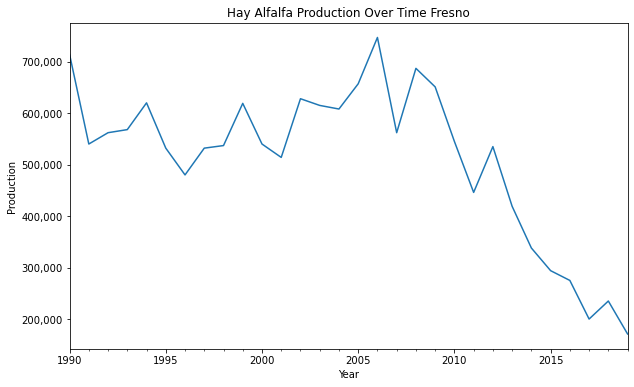

In [61]:
#San Berdanio 
# Convert the 'Year' column to datetime
fresno_alfalfa['Year'] = pd.to_datetime(fresno_alfalfa['Year'], format='%Y')

# Set the 'Year' column as the index
fresno_alfalfa.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(fresno_alfalfa['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
time_series.plot()
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Hay Alfalfa Production Over Time Fresno')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('Fresno - Hayalfa - 1.png')
plt.show()

# AdFuller

In [62]:
# Perform Augmented Dickey-Fuller test
result = adfuller(fresno_alfalfa['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -1.6321000727766795
p-value: 0.466391643383194


In [63]:
adfuller(fresno_alfalfa['Production'].diff()[1:])

(-1.411982703532732,
 0.5765181692493029,
 3,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 480.0899805000842)

In [64]:
p_val = adfuller(fresno_alfalfa['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 0.5765181692493029,
 so we cannot reject the null hypothesis that the differenced data is not stationary.


# ACF & PACF

In [65]:
fresno_alfalfa.drop(['County', 'Crop Name'], axis=1, inplace=True)

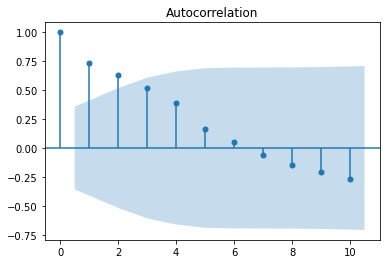

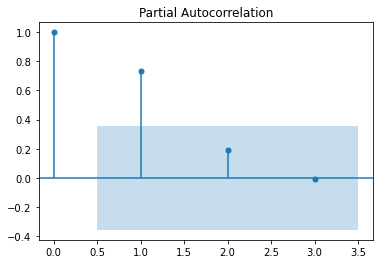

In [66]:
plot_acf(fresno_alfalfa, lags=10);
plot_pacf(fresno_alfalfa,lags=3, method='ywm');

# Stationary and Test Split

In [67]:
def stationary(*args):

    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(fresno_alfalfa['Production'])

# Split the data using ttsplit
train, test = ttsplit(fresno_alfalfa['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

False

Train Data:
Year
1990-01-01    714000.0
1991-01-01    540000.0
1992-01-01    562000.0
1993-01-01    568000.0
1994-01-01    620000.0
1995-01-01    532000.0
1996-01-01    480000.0
1997-01-01    532000.0
1998-01-01    537000.0
1999-01-01    619000.0
2000-01-01    540000.0
2001-01-01    514000.0
2002-01-01    628000.0
2003-01-01    615000.0
2004-01-01    608000.0
2005-01-01    657000.0
2006-01-01    747000.0
2007-01-01    562000.0
2008-01-01    687000.0
2009-01-01    651000.0
2010-01-01    545000.0
2011-01-01    446000.0
2012-01-01    535000.0
2013-01-01    419000.0
2014-01-01    338000.0
2015-01-01    294000.0
2016-01-01    275000.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    200000.0
2018-01-01    235000.0
2019-01-01    171000.0
Name: Production, dtype: float64


# ARIMA

In [68]:
#Finding Ideal P,D,Q 

def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 649.0831710485119
P of:  2
d of:  2
q of:  4


In [69]:
#Model Test
model = ARIMA(train, order=(2, 2, 4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -317.542
Date:                Thu, 01 Jun 2023   AIC                            649.083
Time:                        06:15:12   BIC                            657.615
Sample:                    01-01-1990   HQIC                           651.450
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9230      0.107     -8.628      0.000      -1.133      -0.713
ar.L2         -0.8148      0.109     -7.502      0.000      -1.028      -0.602
ma.L1          0.4035      0.256      1.575      0.115      -0.099       0.906
ma.L2          0.2959      0.241      1.226      0.220      -0.177       0.769
ma.L3         -0.5152      0.282     -1.829      0.067      -1.067       0.037
ma.L4          0.1973      0.180      1.098      0.272      -0.155       0.549
sigma2      5.355e+09   5.02e-11   1.07e+20      0.000    5.35e+09    5.35e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.12   Prob(JB):                         0.60
Heteroskedasticity (H):               0.77   Skew:                             0.03
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.94e+35. Standard errors may be unstable.
"""

In [70]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Modeling

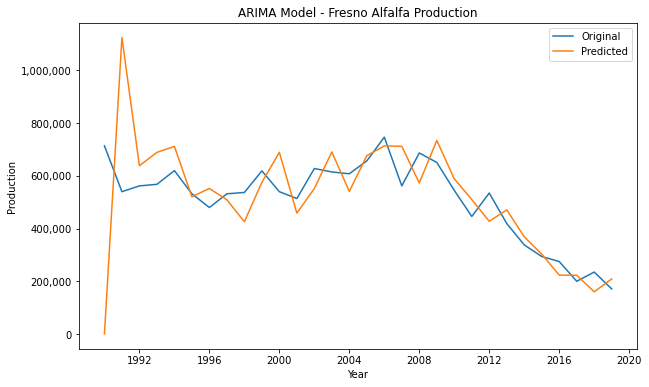

In [71]:
# Fit an ARIMA model to the training data
model = ARIMA(fresno_alfalfa['Production'], order=(2, 2, 4))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict() #no need for parthensis

# Plot the original time series and the predicted values

plt.figure(figsize=(10, 6))
plt.plot(fresno_alfalfa['Production'], label='Original')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
plt.plot(predictions, label='Predicted') #
plt.xlabel('Year')
plt.ylabel('Production')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('ARIMA Model - Fresno Alfalfa Production')
plt.legend()
plt.savefig('Fresno - Hay AlfaAlfa - 1.png')
plt.show()





# Validation

In [72]:
#Training Model on Ideal PDQ 
model = ARIMA(train, order=(2,2,4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -317.542
Date:                Thu, 01 Jun 2023   AIC                            649.083
Time:                        06:15:12   BIC                            657.615
Sample:                    01-01-1990   HQIC                           651.450
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9230      0.107     -8.628      0.000      -1.133      -0.713
ar.L2         -0.8148      0.109     -7.502      0.000      -1.028      -0.602
ma.L1          0.4035      0.256      1.575      0.115      -0.099       0.906
ma.L2          0.2959      0.241      1.226      0.220      -0.177       0.769
ma.L3         -0.5152      0.282     -1.829      0.067      -1.067       0.037
ma.L4          0.1973      0.180      1.098      0.272      -0.155       0.549
sigma2      5.355e+09   5.02e-11   1.07e+20      0.000    5.35e+09    5.35e+09
===================================================================================
Ljung-Box (L1) (Q):                   2.41   Jarque-Bera (JB):                 1.02
Prob(Q):                              0.12   Prob(JB):                         0.60
Heteroskedasticity (H):               0.77   Skew:                             0.03
Prob(H) (two-sided):                  0.72   Kurtosis:                         2.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.94e+35. Standard errors may be unstable.
"""

In [73]:
#fitting
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [74]:
#Predicing MSRE before Cross Validation
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

193980.73539226444

# Cross Test Validation

In [75]:
#Up with modeling
#have match the best order with training data

train.index
train_with_ind = train.reset_index()

In [76]:
#Splitting

split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [77]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

75938.7715517828
58612.34008337376
85856.79214782758
136746.946384157
192892.02427005413


In [78]:
ar_1.arparams

array([-0.92302568, -0.81475717])

In [79]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()


ar_2.predict(typ='levels')

1990-01-01    0.000000e+00
1991-01-01    1.130707e+06
1992-01-01    6.338778e+05
1993-01-01    6.803414e+05
1994-01-01    7.117554e+05
1995-01-01    5.244600e+05
1996-01-01    5.540407e+05
1997-01-01    5.066804e+05
1998-01-01    4.296408e+05
1999-01-01    5.803842e+05
2000-01-01    6.845299e+05
2001-01-01    4.586835e+05
2002-01-01    5.547890e+05
2003-01-01    6.856798e+05
2004-01-01    5.456216e+05
2005-01-01    6.789948e+05
2006-01-01    7.049889e+05
2007-01-01    7.202823e+05
2008-01-01    5.714919e+05
2009-01-01    7.263629e+05
2010-01-01    5.983961e+05
2011-01-01    5.085737e+05
2012-01-01    4.176643e+05
2013-01-01    4.838186e+05
2014-01-01    3.670303e+05
2015-01-01    2.937754e+05
2016-01-01    2.333035e+05
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [80]:
#Different Values for different PDQ's
print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

649.0831710485119
649.0831710485119
649.0831710485119


In [81]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

193980.73539226444

In [82]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

72290.46375252304
57688.89521031656
85143.52959280358
138312.38677169126
192643.0668614758


In [83]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [84]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [85]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [86]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [87]:
#The Final Evaluation with everything
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

36232.13836439629
36232.13836439629
317721.8356832269
36232.13836439629


# Predictions and RMSE 

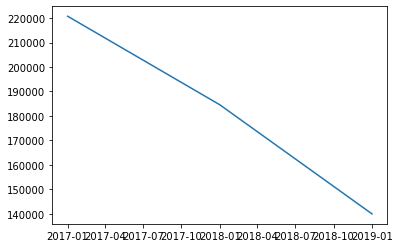

In [88]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

#Blue is prediction
fig, ax = plt.subplots()
ax.plot(y_hat_test);

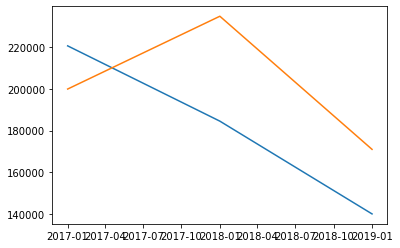

In [89]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);
#Blue is prediction
#actual is orange

In [90]:
#RMSE - keee

#In Units in the predicition - Production 
#On average prediictions may be off 
np.sqrt(mean_squared_error(test, y_hat_test))

36232.13836439629

The model is about able to the future Production Value of Hay Alfalfa in Fresno with 77% Certainity

## Naive Shifted

In [91]:
# Shift the 'Production' column by one period to create a naive shifted model
fresno_alfalfa['Production_shifted'] = fresno_alfalfa['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
fresno_alfalfa.dropna(inplace=True)

# Print the modified DataFrame
print(fresno_alfalfa)

            Production  Production_shifted
Year                                      
1991-01-01    540000.0            714000.0
1992-01-01    562000.0            540000.0
1993-01-01    568000.0            562000.0
1994-01-01    620000.0            568000.0
1995-01-01    532000.0            620000.0
1996-01-01    480000.0            532000.0
1997-01-01    532000.0            480000.0
1998-01-01    537000.0            532000.0
1999-01-01    619000.0            537000.0
2000-01-01    540000.0            619000.0
2001-01-01    514000.0            540000.0
2002-01-01    628000.0            514000.0
2003-01-01    615000.0            628000.0
2004-01-01    608000.0            615000.0
2005-01-01    657000.0            608000.0
2006-01-01    747000.0            657000.0
2007-01-01    562000.0            747000.0
2008-01-01    687000.0            562000.0
2009-01-01    651000.0            687000.0
2010-01-01    545000.0            651000.0
2011-01-01    446000.0            545000.0
2012-01-01 

In [92]:
# Create the feature matrix X and target variable y
X = fresno_alfalfa[['Production_shifted']]
y = fresno_alfalfa['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 98638.2712649015


# Forecast

Text(0.5, 1.0, ' Fresno Alfalfa Production')

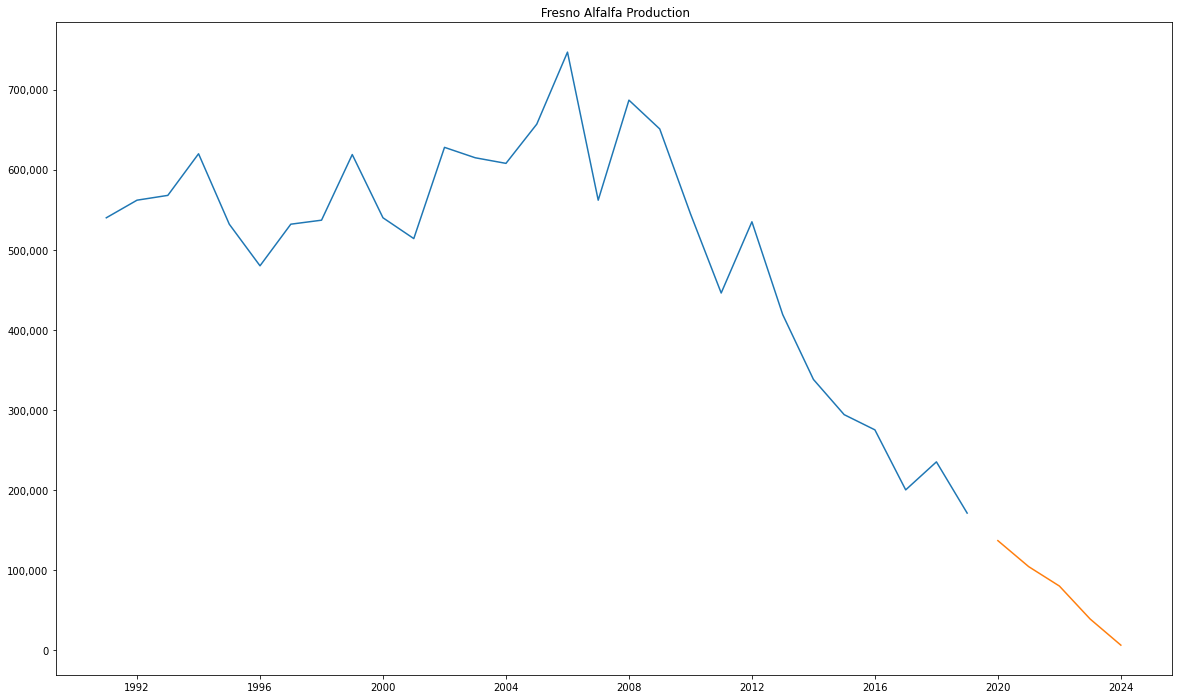

In [93]:
forecast_1 = model_fit.forecast(steps=(5))

fig, ax = plt.subplots(figsize=(20,12))

plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.plot(fresno_alfalfa['Production'], label='original')
plt.savefig('Fresno - alfala - 3.png')
ax.plot(forecast_1, label='test_pred')

plt.title(' Fresno Alfalfa Production')


In [94]:
np.sqrt(mean_squared_error(test, y_hat_test))

36232.13836439629

## Conclusion

When compared to testing(36,232) data agianst training data (19,3980) and naive (98,638) , meaning that our model is effective predicting annual production with a range of a few thousand

## Tulare

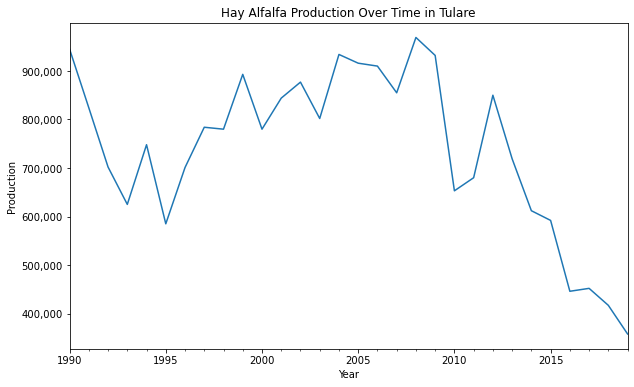

In [95]:
# Convert the 'Year' column to datetime
tulare_alfalfa['Year'] = pd.to_datetime(tulare_alfalfa['Year'], format='%Y')

# Set the 'Year' column as the index
tulare_alfalfa.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(tulare_alfalfa['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
time_series.plot()
plt.xlabel('Year')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Production')
plt.title('Hay Alfalfa Production Over Time in Tulare')
plt.savefig('Hay Alfalfa - Tulare - 1.png')
plt.show()


# AdFuller

In [96]:
# Perform Augmented Dickey-Fuller test
result = adfuller(tulare_alfalfa['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: 0.2196885456157215
p-value: 0.9733444950967473


In [97]:
adfuller(tulare_alfalfa['Production'].diff()[1:])

(-5.229726501958898,
 7.643106514630144e-06,
 1,
 27,
 {'1%': -3.6996079738860943,
  '5%': -2.9764303469999494,
  '10%': -2.627601001371742},
 493.6829774901119)

In [98]:
p_val = adfuller(tulare_alfalfa['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 7.643106514630144e-06,
 so we can safely assume that the differenced data is stationary.


# ACF & PACF

In [99]:
tulare_alfalfa.drop(['County', 'Crop Name'], axis=1, inplace=True)

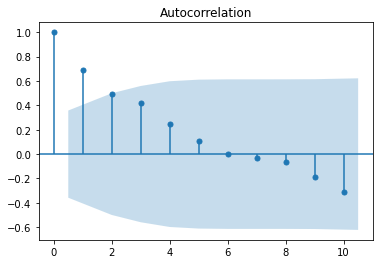

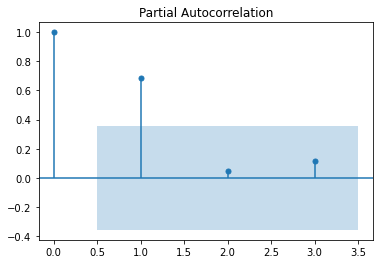

In [100]:
plot_acf(tulare_alfalfa, lags=10);
plot_pacf(tulare_alfalfa,lags=3, method='ywm');

# Stationary and Test Split

In [101]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(tulare_alfalfa['Production'])

# Split the data using ttsplit
train, test = ttsplit(tulare_alfalfa['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

False

Train Data:
Year
1990-01-01    945000.0
1991-01-01    824000.0
1992-01-01    702000.0
1993-01-01    625000.0
1994-01-01    748000.0
1995-01-01    585000.0
1996-01-01    701000.0
1997-01-01    784000.0
1998-01-01    780000.0
1999-01-01    893000.0
2000-01-01    780000.0
2001-01-01    844000.0
2002-01-01    877000.0
2003-01-01    802000.0
2004-01-01    934000.0
2005-01-01    916000.0
2006-01-01    910000.0
2007-01-01    855000.0
2008-01-01    969000.0
2009-01-01    932000.0
2010-01-01    653000.0
2011-01-01    680000.0
2012-01-01    850000.0
2013-01-01    719000.0
2014-01-01    612000.0
2015-01-01    592000.0
2016-01-01    446000.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    452000.0
2018-01-01    417000.0
2019-01-01    358000.0
Name: Production, dtype: float64


# ARIMA

In [102]:
#Finding Ideal P,D,Q

def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 667.5080160247034
P of:  0
d of:  2
q of:  4


In [103]:
#Model Test
model = ARIMA(train, order=(0, 2, 4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -328.754
Date:                Thu, 01 Jun 2023   AIC                            667.508
Time:                        06:15:21   BIC                            673.602
Sample:                    01-01-1990   HQIC                           669.198
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8428      0.444     -1.897      0.058      -1.713       0.028
ma.L2         -0.4046      0.264     -1.530      0.126      -0.923       0.114
ma.L3          0.0822      0.278      0.296      0.767      -0.462       0.627
ma.L4          0.3356      0.248      1.355      0.176      -0.150       0.821
sigma2      1.902e+10   1.16e-11   1.64e+21      0.000     1.9e+10     1.9e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.54   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.06   Prob(JB):                         0.71
Heteroskedasticity (H):               1.18   Skew:                            -0.16
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.16e+37. Standard errors may be unstable.
"""

In [104]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Modeling

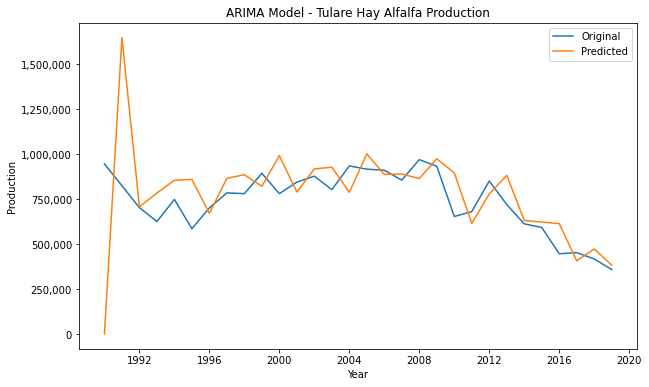

In [105]:
# Fit an ARIMA model to the training data
model = ARIMA(tulare_alfalfa['Production'], order=(0, 2, 4))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(tulare_alfalfa['Production'], label='Original')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Production')
plt.title('ARIMA Model - Tulare Hay Alfalfa Production')
plt.legend()
plt.savefig('Hay Alfalfa - Tulare - 2.png')
plt.show()



# Validation

In [106]:
#Training Model on Ideal PDQ
model = ARIMA(train, order=(0, 2, 4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 2, 4)   Log Likelihood                -328.754
Date:                Thu, 01 Jun 2023   AIC                            667.508
Time:                        06:15:22   BIC                            673.602
Sample:                    01-01-1990   HQIC                           669.198
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8428      0.444     -1.897      0.058      -1.713       0.028
ma.L2         -0.4046      0.264     -1.530      0.126      -0.923       0.114
ma.L3          0.0822      0.278      0.296      0.767      -0.462       0.627
ma.L4          0.3356      0.248      1.355      0.176      -0.150       0.821
sigma2      1.902e+10   1.16e-11   1.64e+21      0.000     1.9e+10     1.9e+10
===================================================================================
Ljung-Box (L1) (Q):                   3.54   Jarque-Bera (JB):                 0.69
Prob(Q):                              0.06   Prob(JB):                         0.71
Heteroskedasticity (H):               1.18   Skew:                            -0.16
Prob(H) (two-sided):                  0.82   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.16e+37. Standard errors may be unstable.
"""

In [107]:
#Fitting
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [108]:
#Prediciting MSRE before Cross Validating
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

266806.69341619767

# Cross Test Validation

In [109]:
train.index
train_with_ind = train.reset_index()

In [110]:
split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [111]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

132292.27743350843
84960.59318003093
40541.79704369398
209762.90396650138
255250.2358446944


In [112]:
ar_1.arparams

array([-1.40550621, -0.78792503])

In [113]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()

ar_2.predict(typ='levels')

1990-01-01    0.000000e+00
1991-01-01    1.656153e+06
1992-01-01    7.542477e+05
1993-01-01    7.508326e+05
1994-01-01    7.700973e+05
1995-01-01    7.434318e+05
1996-01-01    6.405503e+05
1997-01-01    7.850934e+05
1998-01-01    8.291231e+05
1999-01-01    8.612318e+05
2000-01-01    9.387354e+05
2001-01-01    7.908814e+05
2002-01-01    9.116835e+05
2003-01-01    9.180722e+05
2004-01-01    7.985224e+05
2005-01-01    1.037791e+06
2006-01-01    9.235451e+05
2007-01-01    9.245100e+05
2008-01-01    8.947606e+05
2009-01-01    1.017607e+06
2010-01-01    9.498849e+05
2011-01-01    5.452893e+05
2012-01-01    7.576073e+05
2013-01-01    9.469488e+05
2014-01-01    6.042091e+05
2015-01-01    6.627354e+05
2016-01-01    5.863479e+05
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [114]:
print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

667.5080160247034
679.6937290612117
679.6937290612117


In [115]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

266806.69341619767

In [116]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

128077.6033714325
84789.74156806282
40222.329596524294
202050.6374164021
227969.64920358447


In [117]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [118]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [119]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [120]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))


In [121]:
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

55870.156895145854
55870.156895145854
330210.51259171957
55870.156895145854


# Predictions and RMSE

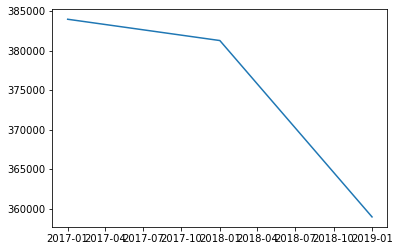

In [122]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots()
ax.plot(y_hat_test);

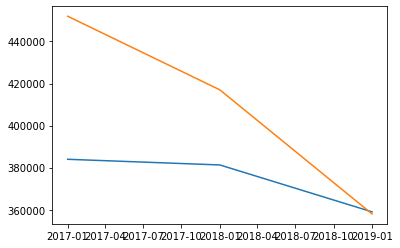

In [123]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);

In [124]:
np.sqrt(mean_squared_error(test, y_hat_test))

44361.49625366802

## Naive Shifted 

In [125]:
# Shift the 'Production' column by one period to create a naive shifted model
tulare_alfalfa['Production_shifted'] = tulare_alfalfa['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
tulare_alfalfa.dropna(inplace=True)

# Print the modified DataFrame
print(tulare_alfalfa)

            Production  Production_shifted
Year                                      
1991-01-01    824000.0            945000.0
1992-01-01    702000.0            824000.0
1993-01-01    625000.0            702000.0
1994-01-01    748000.0            625000.0
1995-01-01    585000.0            748000.0
1996-01-01    701000.0            585000.0
1997-01-01    784000.0            701000.0
1998-01-01    780000.0            784000.0
1999-01-01    893000.0            780000.0
2000-01-01    780000.0            893000.0
2001-01-01    844000.0            780000.0
2002-01-01    877000.0            844000.0
2003-01-01    802000.0            877000.0
2004-01-01    934000.0            802000.0
2005-01-01    916000.0            934000.0
2006-01-01    910000.0            916000.0
2007-01-01    855000.0            910000.0
2008-01-01    969000.0            855000.0
2009-01-01    932000.0            969000.0
2010-01-01    653000.0            932000.0
2011-01-01    680000.0            653000.0
2012-01-01 

In [126]:
# Create the feature matrix X and target variable y
X = tulare_alfalfa[['Production_shifted']]
y = tulare_alfalfa['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 81816.0497540163


# Forecast

Text(0.5, 1.0, 'Hay Alfalfa Production Time in Tulare')

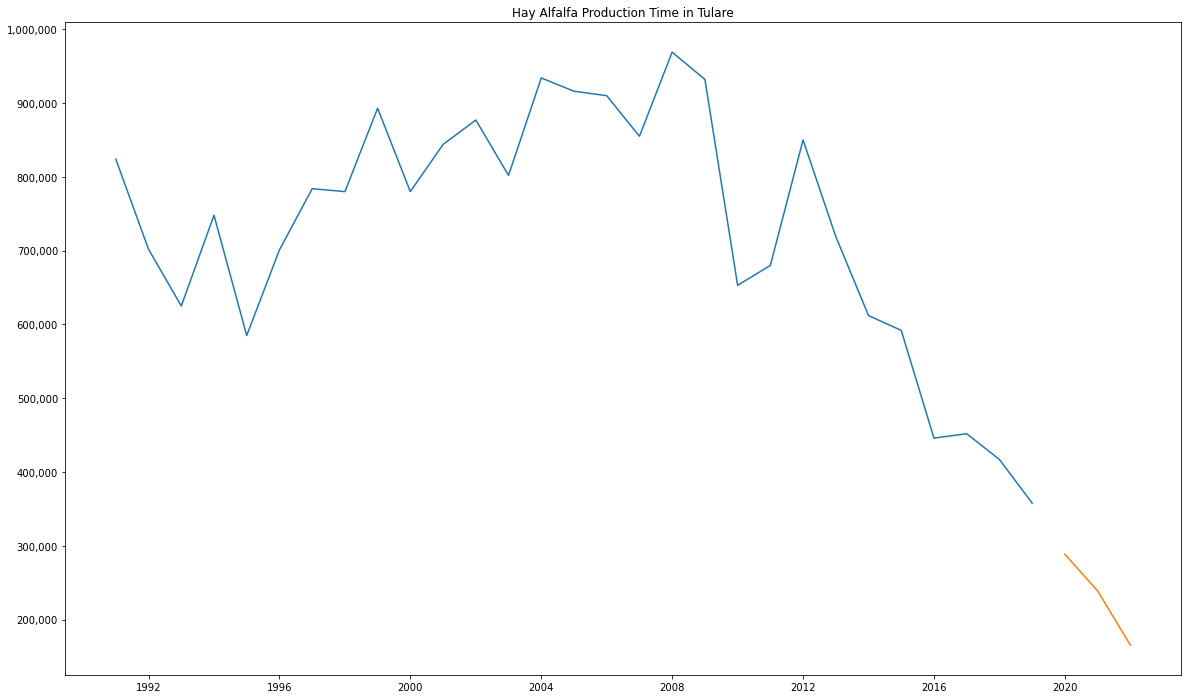

In [127]:
forecast_1 = model_fit.forecast(steps=(3))

fig, ax = plt.subplots(figsize=(20,12))

ax.plot(tulare_alfalfa['Production'], label='original')
ax.plot(forecast_1, label='test_pred')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('Tulare - Alfalfa - 3.png')
plt.title('Hay Alfalfa Production Time in Tulare')



# Conlcusion: 

When compared to testing(44,361) data agianst training data (37,924) and naive (81,816) , meaning that our model is effective predicting annual production with a range of a few thousand

# Stanislaus

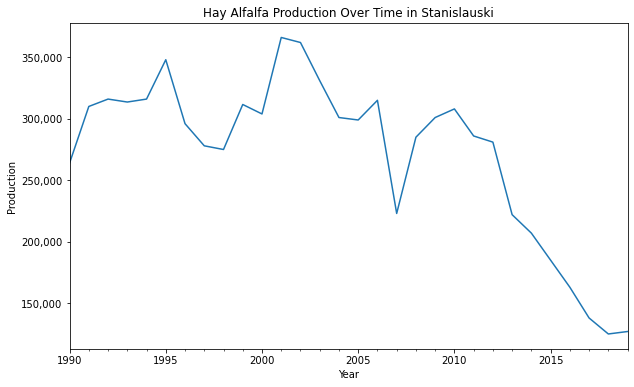

In [128]:
#San Berdanio 
# Convert the 'Year' column to datetime
stan_alfalfa['Year'] = pd.to_datetime(stan_alfalfa['Year'], format='%Y')

# Set the 'Year' column as the index
stan_alfalfa.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(stan_alfalfa['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
time_series.plot()
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Hay Alfalfa Production Over Time in Stanislauski')
plt.savefig('Hay Alfalfa - Stan - 1.png')
plt.show()


# AdFuller

In [129]:
# Perform Augmented Dickey-Fuller test
result = adfuller(stan_alfalfa['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -0.43888765849866773
p-value: 0.9034006699645964


In [130]:
adfuller(stan_alfalfa['Production'].diff()[1:])

(-6.16637844383222,
 6.973858084722582e-08,
 0,
 28,
 {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224},
 454.4493210424031)

In [131]:
p_val = adfuller(stan_alfalfa['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 6.973858084722582e-08,
 so we can safely assume that the differenced data is stationary.


# ACF & PACF

In [132]:
stan_alfalfa.drop(['County', 'Crop Name'], axis=1, inplace=True)

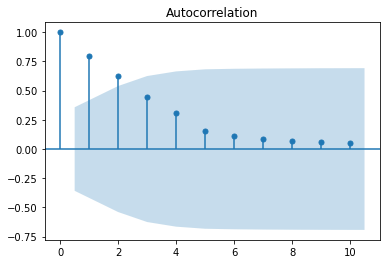

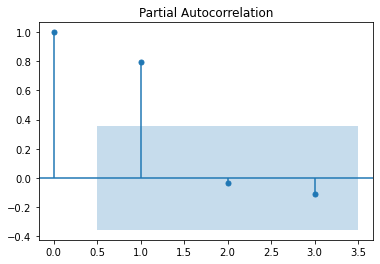

In [133]:
plot_acf(stan_alfalfa, lags=10);
plot_pacf(stan_alfalfa,lags=3, method='ywm');

# Stationary and Test Split

In [134]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(stan_alfalfa['Production'])

# Split the data using ttsplit
train, test = ttsplit(stan_alfalfa['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

False

Train Data:
Year
1990-01-01    264000.0
1991-01-01    310000.0
1992-01-01    316000.0
1993-01-01    313600.0
1994-01-01    316000.0
1995-01-01    348000.0
1996-01-01    296000.0
1997-01-01    278000.0
1998-01-01    275000.0
1999-01-01    311600.0
2000-01-01    303900.0
2001-01-01    366100.0
2002-01-01    362000.0
2003-01-01    331000.0
2004-01-01    301000.0
2005-01-01    299000.0
2006-01-01    315000.0
2007-01-01    223000.0
2008-01-01    285000.0
2009-01-01    301000.0
2010-01-01    308000.0
2011-01-01    286000.0
2012-01-01    281000.0
2013-01-01    222000.0
2014-01-01    207000.0
2015-01-01    185000.0
2016-01-01    163000.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    138000.0
2018-01-01    125000.0
2019-01-01    127000.0
Name: Production, dtype: float64


# ARIMA

In [135]:
#Finding ideal PDQ
def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 612.3155391649497
P of:  0
d of:  2
q of:  2


In [136]:
#Model Test
model = ARIMA(train, order=(0, 2, 2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -303.158
Date:                Thu, 01 Jun 2023   AIC                            612.316
Time:                        06:15:31   BIC                            615.972
Sample:                    01-01-1990   HQIC                           613.330
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5725      0.136     -4.222      0.000      -0.838      -0.307
ma.L2         -0.2001      0.151     -1.325      0.185      -0.496       0.096
sigma2      1.951e+09   1.46e-11   1.34e+20      0.000    1.95e+09    1.95e+09
===================================================================================
Ljung-Box (L1) (Q):                   3.14   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.08   Prob(JB):                         0.37
Heteroskedasticity (H):               0.27   Skew:                             0.47
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [137]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Modeling

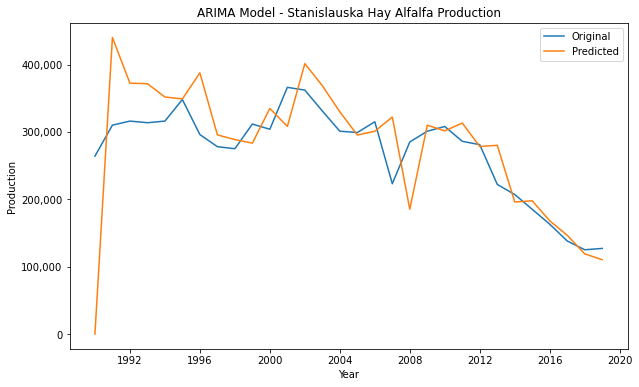

In [138]:
# Fit an ARIMA model to the training data
model = ARIMA(stan_alfalfa['Production'], order=(0, 2, 2))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(stan_alfalfa['Production'], label='Original')
plt.plot(predictions, label='Predicted')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('ARIMA Model - Stanislauska Hay Alfalfa Production')
plt.legend()
plt.savefig('Hay alfalfa - stan - 2.png')
plt.show()


# Validation

In [139]:
#Training Model on Ideal PDQ
model = ARIMA(train, order=(0, 2, 2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -303.158
Date:                Thu, 01 Jun 2023   AIC                            612.316
Time:                        06:15:31   BIC                            615.972
Sample:                    01-01-1990   HQIC                           613.330
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5725      0.136     -4.222      0.000      -0.838      -0.307
ma.L2         -0.2001      0.151     -1.325      0.185      -0.496       0.096
sigma2      1.951e+09   1.46e-11   1.34e+20      0.000    1.95e+09    1.95e+09
===================================================================================
Ljung-Box (L1) (Q):                   3.14   Jarque-Bera (JB):                 1.99
Prob(Q):                              0.08   Prob(JB):                         0.37
Heteroskedasticity (H):               0.27   Skew:                             0.47
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [140]:
#Fitting
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [141]:
#Predicting MSRE before Cross Validation
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

69950.42752105033

# Cross Test Validation

In [142]:
#Up with Modeling 
train.index
train_with_ind = train.reset_index()

In [143]:
#Splitting
split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [144]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

16939.302025412908
45694.02680116447
38125.611528424044
12393.60928529027
89280.49688246557


In [145]:
ar_1.arparams

array([-1.89833323, -0.99977101])

In [146]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()

ar_2.predict(typ='levels')

1990-01-01         0.000000
1991-01-01    479416.862998
1992-01-01    326256.846133
1993-01-01    353463.796653
1994-01-01    352313.182495
1995-01-01    338318.268740
1996-01-01    382962.650889
1997-01-01    301634.502230
1998-01-01    262445.942791
1999-01-01    331742.167627
2000-01-01    296680.837951
2001-01-01    351021.610279
2002-01-01    380444.910759
2003-01-01    383553.343261
2004-01-01    316255.146604
2005-01-01    299794.995805
2006-01-01    327089.677694
2007-01-01    301537.038299
2008-01-01    210156.292892
2009-01-01    312516.029681
2010-01-01    333504.470930
2011-01-01    281900.454129
2012-01-01    312906.363069
2013-01-01    265665.310570
2014-01-01    197599.402582
2015-01-01    231137.151358
2016-01-01    141758.320523
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [147]:
#Different Values for Different PDQ's
print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

612.3155391649497
613.0521149402423
613.0521149402423


In [148]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

69950.42752105033

In [149]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

16878.143497900925
46216.011077702846
38308.796169641166
12993.556546402659
89220.74261699838


In [150]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [151]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [152]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [153]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [154]:
#The Final Evaluation with Everything
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

71941.58904268446
71941.58904268446
145312.53101558748
71941.58904268446


# Predictions and RMSE 

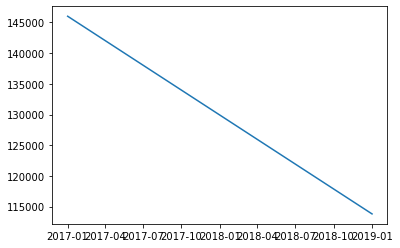

In [155]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots()
ax.plot(y_hat_test);

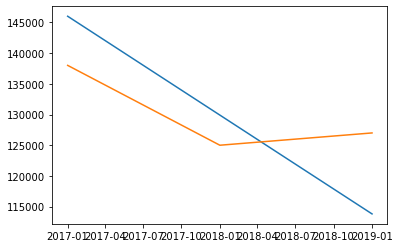

In [156]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);

In [157]:
np.sqrt(mean_squared_error(test, y_hat_test))

9342.938563387417

## Naive Shifted 

In [158]:
# Shift the 'Production' column by one period to create a naive shifted model
stan_alfalfa['Production_shifted'] = stan_alfalfa['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
stan_alfalfa.dropna(inplace=True)

# Print the modified DataFrame
print(stan_alfalfa)

            Production  Production_shifted
Year                                      
1991-01-01    310000.0            264000.0
1992-01-01    316000.0            310000.0
1993-01-01    313600.0            316000.0
1994-01-01    316000.0            313600.0
1995-01-01    348000.0            316000.0
1996-01-01    296000.0            348000.0
1997-01-01    278000.0            296000.0
1998-01-01    275000.0            278000.0
1999-01-01    311600.0            275000.0
2000-01-01    303900.0            311600.0
2001-01-01    366100.0            303900.0
2002-01-01    362000.0            366100.0
2003-01-01    331000.0            362000.0
2004-01-01    301000.0            331000.0
2005-01-01    299000.0            301000.0
2006-01-01    315000.0            299000.0
2007-01-01    223000.0            315000.0
2008-01-01    285000.0            223000.0
2009-01-01    301000.0            285000.0
2010-01-01    308000.0            301000.0
2011-01-01    286000.0            308000.0
2012-01-01 

In [159]:
# Create the feature matrix X and target variable y
X = stan_alfalfa[['Production_shifted']]
y = stan_alfalfa['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 49835.691349918794


# Forecast

Text(0.5, 1.0, 'Forecast Stanislauska Hay Alfalfa Production')

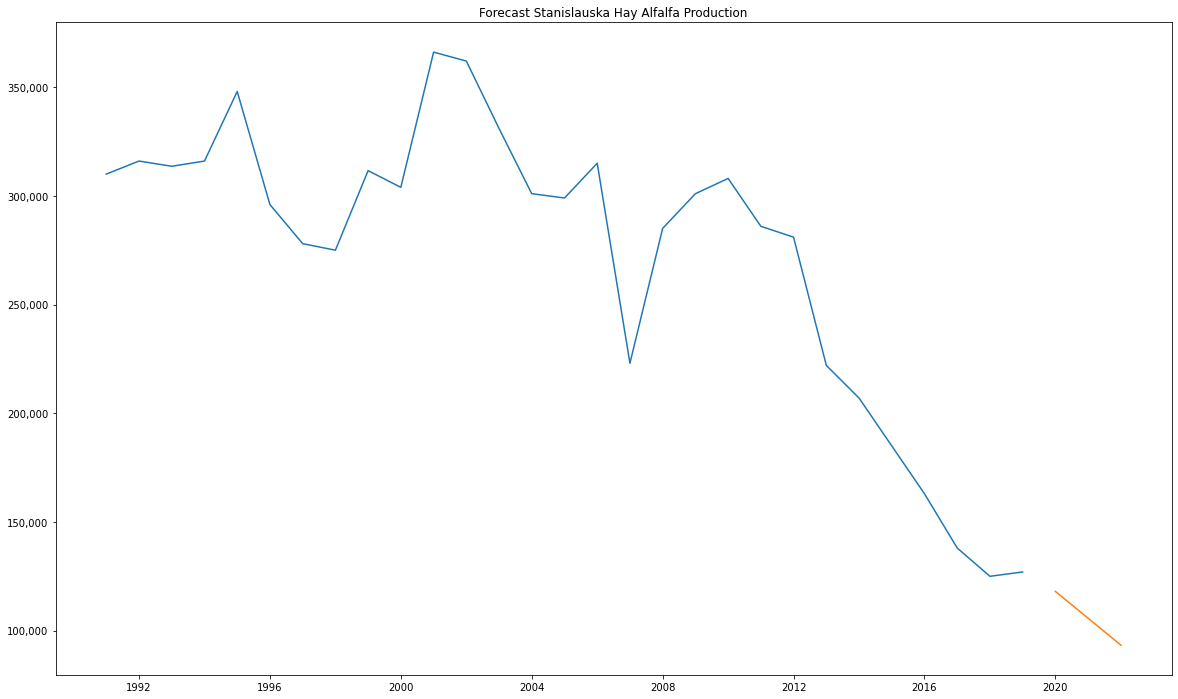

In [160]:
forecast_1 = model_fit.forecast(steps=(3))

fig, ax = plt.subplots(figsize=(20,12))



ax.plot(stan_alfalfa['Production'], label='original')
ax.plot(forecast_1, label='test_pred')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('hay alfalfa - stan - 3.png')
plt.title('Forecast Stanislauska Hay Alfalfa Production')




## Conclusion

When compared to testing(69,950) data agianst training data (9,342) and naive (49,835) , meaning that our model is effective predicting annual production with a range of a few hundred

# English Walnut 

## Fresno 

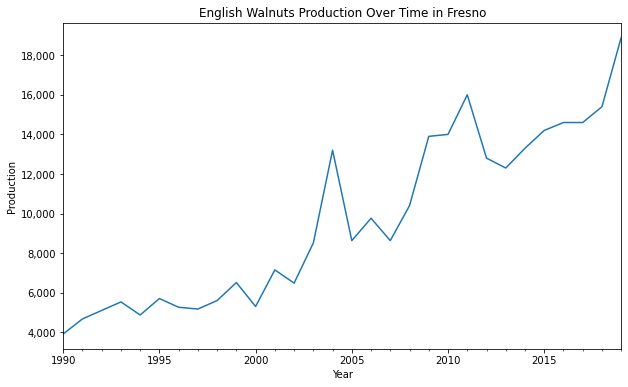

In [161]:
# Convert the 'Year' column to datetime
fresno_nuts['Year'] = pd.to_datetime(fresno_nuts['Year'], format='%Y')

# Set the 'Year' column as the index
fresno_nuts.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(fresno_nuts['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
time_series.plot()
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('English Walnuts Production Over Time in Fresno')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('Walnuts - Fresno - 1.png')
plt.show()



# AdFuller

In [162]:
# Perform Augmented Dickey-Fuller test
result = adfuller(fresno_nuts['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: 0.5006887630610013
p-value: 0.9848940156771381


In [163]:
adfuller(fresno_nuts['Production'].diff()[1:])

(-4.8550795092957255,
 4.261951889366747e-05,
 3,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 344.1203615678267)

In [164]:
p_val = adfuller(fresno_nuts['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 4.261951889366747e-05,
 so we can safely assume that the differenced data is stationary.


# ACF & PACF

In [165]:
fresno_nuts.drop(['County', 'Crop Name'], axis=1, inplace=True)

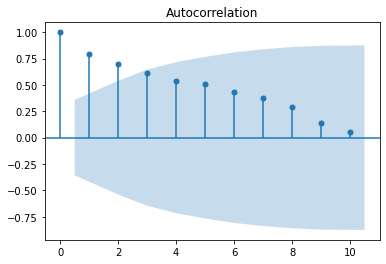

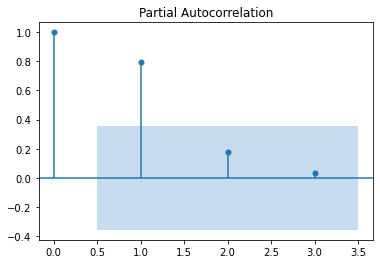

In [166]:
plot_acf(fresno_nuts, lags=10);
plot_pacf(fresno_nuts,lags=3, method='ywm');

# Stationary and Test Split

In [167]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(fresno_nuts['Production'])

# Split the data using ttsplit
train, test = ttsplit(fresno_nuts['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

False

Train Data:
Year
1990-01-01     3910.0
1991-01-01     4670.0
1992-01-01     5100.0
1993-01-01     5530.0
1994-01-01     4870.0
1995-01-01     5700.0
1996-01-01     5260.0
1997-01-01     5170.0
1998-01-01     5600.0
1999-01-01     6510.0
2000-01-01     5300.0
2001-01-01     7150.0
2002-01-01     6480.0
2003-01-01     8510.0
2004-01-01    13200.0
2005-01-01     8630.0
2006-01-01     9760.0
2007-01-01     8630.0
2008-01-01    10400.0
2009-01-01    13900.0
2010-01-01    14000.0
2011-01-01    16000.0
2012-01-01    12800.0
2013-01-01    12300.0
2014-01-01    13300.0
2015-01-01    14200.0
2016-01-01    14600.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    14600.0
2018-01-01    15400.0
2019-01-01    18900.0
Name: Production, dtype: float64


# ARIMA

In [168]:
def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 451.00784022341526
P of:  4
d of:  2
q of:  1


In [169]:
#Model Test
model = ARIMA(train, order=(4, 2, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -219.504
Date:                Thu, 01 Jun 2023   AIC                            451.008
Time:                        06:15:43   BIC                            458.321
Sample:                    01-01-1990   HQIC                           453.036
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4111      0.148     -2.785      0.005      -0.700      -0.122
ar.L2         -0.2245      0.273     -0.823      0.411      -0.759       0.310
ar.L3         -0.3458      0.232     -1.494      0.135      -0.800       0.108
ar.L4         -0.5349      0.174     -3.078      0.002      -0.876      -0.194
ma.L1         -0.9975      0.296     -3.370      0.001      -1.578      -0.417
sigma2      2.013e+06   1.49e-07   1.35e+13      0.000    2.01e+06    2.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.86
Prob(Q):                              0.96   Prob(JB):                         0.02
Heteroskedasticity (H):               1.56   Skew:                             1.04
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+28. Standard errors may be unstable.
"""

In [170]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Modeling

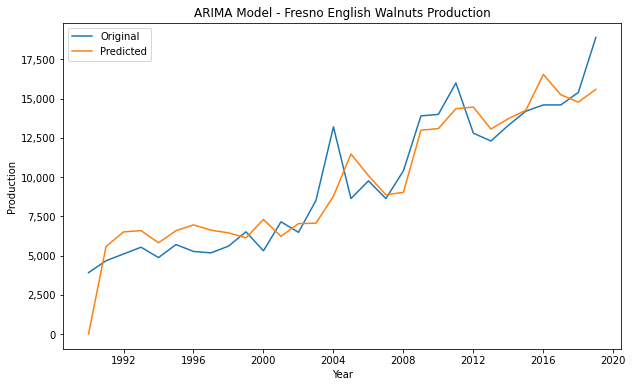

In [171]:
# Fit an ARIMA model to the training data
model = ARIMA(fresno_nuts['Production'], order=(4, 2, 1))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(fresno_nuts['Production'], label='Original')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('ARIMA Model - Fresno English Walnuts Production')
plt.legend()
plt.savefig('Walnuts - Fresno -  2.png')
plt.show()


# Validation

In [172]:
#Creates a model off the best PDQ 
model = ARIMA(train, order=(4, 2, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -219.504
Date:                Thu, 01 Jun 2023   AIC                            451.008
Time:                        06:15:43   BIC                            458.321
Sample:                    01-01-1990   HQIC                           453.036
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4111      0.148     -2.785      0.005      -0.700      -0.122
ar.L2         -0.2245      0.273     -0.823      0.411      -0.759       0.310
ar.L3         -0.3458      0.232     -1.494      0.135      -0.800       0.108
ar.L4         -0.5349      0.174     -3.078      0.002      -0.876      -0.194
ma.L1         -0.9975      0.296     -3.370      0.001      -1.578      -0.417
sigma2      2.013e+06   1.49e-07   1.35e+13      0.000    2.01e+06    2.01e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.86
Prob(Q):                              0.96   Prob(JB):                         0.02
Heteroskedasticity (H):               1.56   Skew:                             1.04
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.37e+28. Standard errors may be unstable.
"""

In [173]:
#Fitting
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [174]:
#Prediciting MSRE before Cross Validation
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

1739.454258949923

# Cross Test Validation

In [175]:
train.index
train_with_ind = train.reset_index()

In [176]:
split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [177]:
#Splitting

for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

662.1316240409645
4315.100607616092
5351.723293662711
4428.501362854294
954.0251955004209


In [178]:
ar_1.arparams

array([-1.64782255, -0.781651  ])

In [179]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()

ar_2.predict(typ='levels')

1990-01-01        0.000000
1991-01-01     5643.472076
1992-01-01     6199.313818
1993-01-01     6905.606107
1994-01-01     6331.838067
1995-01-01     6284.787555
1996-01-01     6152.475103
1997-01-01     6184.824469
1998-01-01     5738.730462
1999-01-01     6088.875461
2000-01-01     7051.069774
2001-01-01     5604.980593
2002-01-01     8112.076466
2003-01-01     6010.193034
2004-01-01    10320.784722
2005-01-01    12102.692044
2006-01-01    10180.158083
2007-01-01    10466.090448
2008-01-01     8400.975781
2009-01-01    12303.711310
2010-01-01    12482.457765
2011-01-01    16264.048158
2012-01-01    14968.680529
2013-01-01    14564.179231
2014-01-01    12407.877690
2015-01-01    14198.449969
2016-01-01    14376.951449
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [180]:
#Different Values for Different PDQ's 
print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

451.00784022341526
455.5619037801287
455.5619037801287


In [181]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

1739.454258949923

In [182]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

526.4248341671417
4331.305853452633
7228.841022544196
4446.284189583688
995.2017820403523


In [183]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [184]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [185]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [186]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))


In [187]:
#The Final Evaluation of Everything
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

1726.392868672315
1726.392868672315
7154.316047600538
1726.392868672315


# Predictions and RMSE

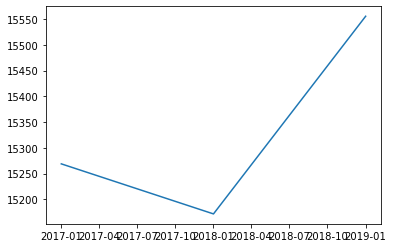

In [188]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots()
ax.plot(y_hat_test);

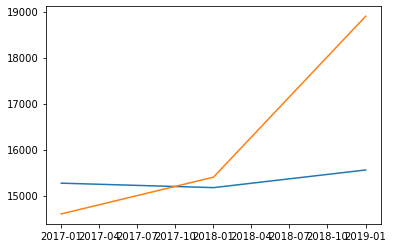

In [189]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);

In [190]:
np.sqrt(mean_squared_error(test, y_hat_test))

1973.5476316792347

## Naive Shifted 

In [191]:
# Shift the 'Production' column by one period to create a naive shifted model
fresno_nuts['Production_shifted'] = fresno_nuts['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
fresno_nuts.dropna(inplace=True)

# Print the modified DataFrame
print(fresno_nuts)

            Production  Production_shifted
Year                                      
1991-01-01      4670.0              3910.0
1992-01-01      5100.0              4670.0
1993-01-01      5530.0              5100.0
1994-01-01      4870.0              5530.0
1995-01-01      5700.0              4870.0
1996-01-01      5260.0              5700.0
1997-01-01      5170.0              5260.0
1998-01-01      5600.0              5170.0
1999-01-01      6510.0              5600.0
2000-01-01      5300.0              6510.0
2001-01-01      7150.0              5300.0
2002-01-01      6480.0              7150.0
2003-01-01      8510.0              6480.0
2004-01-01     13200.0              8510.0
2005-01-01      8630.0             13200.0
2006-01-01      9760.0              8630.0
2007-01-01      8630.0              9760.0
2008-01-01     10400.0              8630.0
2009-01-01     13900.0             10400.0
2010-01-01     14000.0             13900.0
2011-01-01     16000.0             14000.0
2012-01-01 

In [192]:
# Create the feature matrix X and target variable y
X = fresno_nuts[['Production_shifted']]
y = fresno_nuts['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1262.0623893401128


# Forecasting

Text(0.5, 1.0, 'Forecast Walnuts Fresno Production')

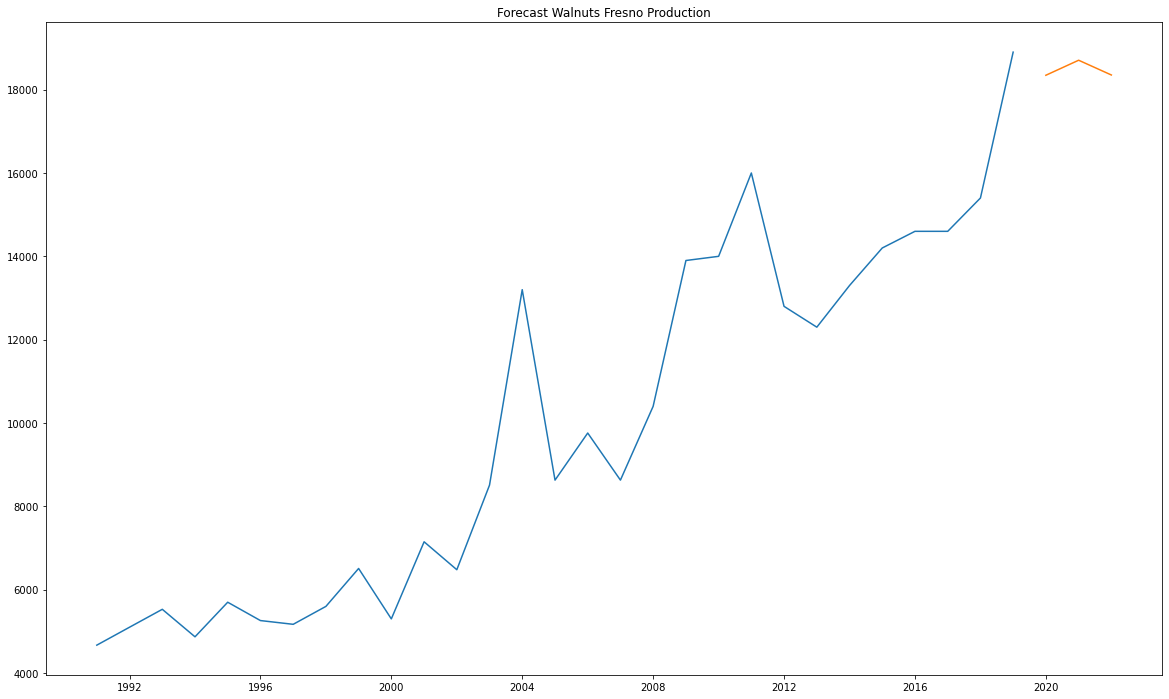

In [193]:
forecast_1 = model_fit.forecast(steps=(3))

fig, ax = plt.subplots(figsize=(20,12))

ax.plot(fresno_nuts['Production'], label='original')
ax.plot(forecast_1, label='test_pred')
plt.savefig('Walnuts - Fresno -  3.png')
plt.title('Forecast Walnuts Fresno Production')



## Conclusion

When compared to testing(1,973) data agianst training data (1,739) and naive (1,262) , meaning that our model is effective predicting annual production with a range of a few hundred
 
 

# Tulare

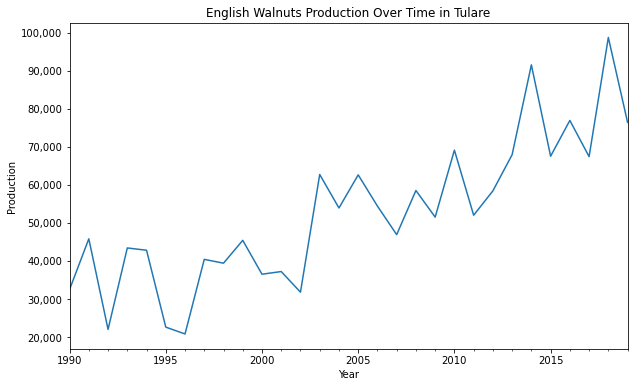

In [194]:
# Convert the 'Year' column to datetime
tulare_nuts['Year'] = pd.to_datetime(tulare_nuts['Year'], format='%Y')

# Set the 'Year' column as the index
tulare_nuts.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(tulare_nuts['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
time_series.plot()
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('English Walnuts Production Over Time in Tulare')
plt.savefig('Walnuts - Tulare - 1.png')
plt.show()



# AdFuller

In [195]:
# Perform Augmented Dickey-Fuller test
result = adfuller(tulare_nuts['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: 0.21778976089600277
p-value: 0.9732419014742874


In [196]:
adfuller(tulare_nuts['Production'].diff()[1:])

(-5.931268938994242,
 2.3775072663647878e-07,
 2,
 26,
 {'1%': -3.7112123008648155,
  '5%': -2.981246804733728,
  '10%': -2.6300945562130176},
 411.86508758112603)

In [197]:
p_val = adfuller(tulare_nuts['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 2.3775072663647878e-07,
 so we can safely assume that the differenced data is stationary.


# ACF & PACF

In [198]:
tulare_nuts.drop(['County', 'Crop Name'], axis=1, inplace=True)

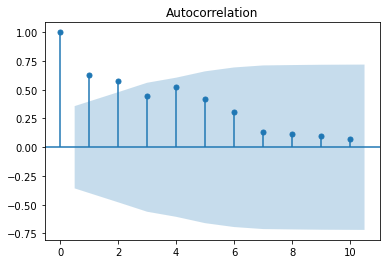

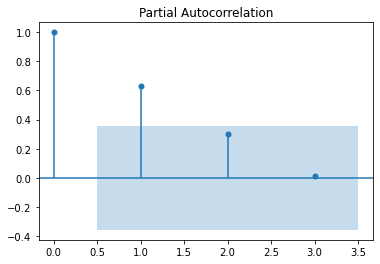

In [199]:
plot_acf(tulare_nuts, lags=10);
plot_pacf(tulare_nuts,lags=3, method='ywm');

# Stationary and Test Split

In [200]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(tulare_nuts['Production'])

# Split the data using ttsplit
train, test = ttsplit(tulare_nuts['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

False

Train Data:
Year
1990-01-01    32500.0
1991-01-01    45800.0
1992-01-01    22000.0
1993-01-01    43400.0
1994-01-01    42800.0
1995-01-01    22600.0
1996-01-01    20800.0
1997-01-01    40400.0
1998-01-01    39400.0
1999-01-01    45400.0
2000-01-01    36500.0
2001-01-01    37200.0
2002-01-01    31780.0
2003-01-01    62700.0
2004-01-01    53900.0
2005-01-01    62600.0
2006-01-01    54400.0
2007-01-01    46900.0
2008-01-01    58500.0
2009-01-01    51500.0
2010-01-01    69100.0
2011-01-01    52000.0
2012-01-01    58400.0
2013-01-01    67900.0
2014-01-01    91500.0
2015-01-01    67500.0
2016-01-01    76900.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    67400.0
2018-01-01    98700.0
2019-01-01    76400.0
Name: Production, dtype: float64


# ARIMA

In [201]:
#Finding the ideal P,D,Q 
def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 552.5594719810261
P of:  0
d of:  2
q of:  2


In [202]:
#Model Test
model = ARIMA(train, order=(0, 2, 2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -273.280
Date:                Thu, 01 Jun 2023   AIC                            552.559
Time:                        06:15:53   BIC                            556.216
Sample:                    01-01-1990   HQIC                           553.574
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9840      0.337     -5.880      0.000      -2.645      -1.323
ma.L2          0.9981      0.384      2.596      0.009       0.245       1.752
sigma2        1.4e+08   5.13e-09   2.73e+16      0.000     1.4e+08     1.4e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.46   Prob(JB):                         0.95
Heteroskedasticity (H):               0.46   Skew:                             0.10
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.15e+32. Standard errors may be unstable.
"""

In [203]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Modeling

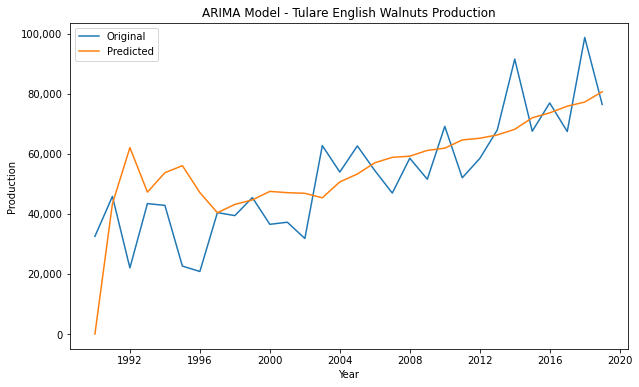

In [204]:

# Fit an ARIMA model to the training data
model = ARIMA(tulare_nuts['Production'], order=(0, 2, 2))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(tulare_nuts['Production'], label='Original')
plt.plot(predictions, label='Predicted')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('ARIMA Model - Tulare English Walnuts Production')
plt.legend()
plt.savefig('Walnuts - Tulare - 2.png')
plt.show()



# Validation

In [205]:
#Training Model on Ideal PDQ
model = ARIMA(train, order=(2,2,4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(2, 2, 4)   Log Likelihood                -272.818
Date:                Thu, 01 Jun 2023   AIC                            559.635
Time:                        06:15:54   BIC                            568.167
Sample:                    01-01-1990   HQIC                           562.002
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9896      0.756     -1.310      0.190      -2.471       0.492
ar.L2         -0.6665      1.002     -0.665      0.506      -2.630       1.297
ma.L1         -0.5417      1.328     -0.408      0.683      -3.144       2.060
ma.L2         -0.6351      1.114     -0.570      0.569      -2.819       1.549
ma.L3         -0.5198      1.932     -0.269      0.788      -4.307       3.268
ma.L4          0.7806      0.772      1.012      0.312      -0.732       2.293
sigma2      2.158e+08   3.46e-09   6.24e+16      0.000    2.16e+08    2.16e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 0.80
Prob(Q):                              0.50   Prob(JB):                         0.67
Heteroskedasticity (H):               0.72   Skew:                             0.08
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.2e+34. Standard errors may be unstable.
"""

In [206]:
#Fitting
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [207]:
#Predicting MSRE before Cross Validation
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

14665.880699773976

# Cross Test Validation

In [208]:
train.index
train_with_ind = train.reset_index()

In [209]:
#Splitting
split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [210]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

19667.346358311366
15191.863642043947
5696.211315734156
7107.047549491344
21470.569574383222


In [211]:
ar_1.arparams

array([-0.98964305, -0.66653899])

In [212]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()

ar_2.predict(typ='levels')

1990-01-01        0.000000
1991-01-01    48268.298181
1992-01-01    58434.210958
1993-01-01    34812.019577
1994-01-01    60247.687485
1995-01-01    50044.263553
1996-01-01    35304.886101
1997-01-01    43569.274801
1998-01-01    41939.626869
1999-01-01    40710.819866
2000-01-01    51013.302569
2001-01-01    40971.467219
2002-01-01    44406.241187
2003-01-01    44899.314182
2004-01-01    52943.028096
2005-01-01    52911.605593
2006-01-01    56748.118301
2007-01-01    58691.745032
2008-01-01    53396.030273
2009-01-01    63762.368851
2010-01-01    57867.725763
2011-01-01    64898.609280
2012-01-01    62919.038136
2013-01-01    60057.110827
2014-01-01    72533.753501
2015-01-01    76313.970274
2016-01-01    66480.361211
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [213]:
#Different Values for Different PDQ's 
print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

559.6352169558863
559.6352169558863
559.6352169558863


In [214]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

14665.880699773976

In [215]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

13222.543596276271
14933.407739444703
11935.449895842175
8652.02753873884
20115.006162376023


In [216]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [217]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [218]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [219]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))


In [220]:
#The Final Evaluation with Everything
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

13011.975551211937
13011.975551211937
32800.71104960945
13011.975551211937


# Predictions and RMSE

In [221]:
np.sqrt(mean_squared_error(test, y_hat_test))

66824.77580560771

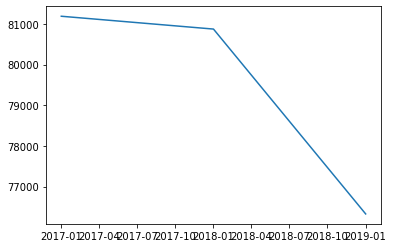

In [222]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots()
ax.plot(y_hat_test);

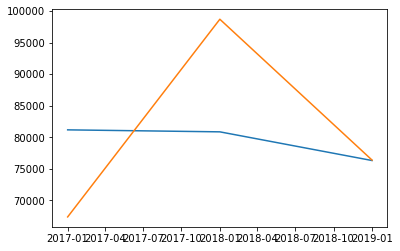

In [223]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);

In [224]:
np.sqrt(mean_squared_error(test, y_hat_test))

13011.975551211937

## Naive Shifted 

In [225]:
# Shift the 'Production' column by one period to create a naive shifted model
tulare_nuts['Production_shifted'] = tulare_nuts['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
tulare_nuts.dropna(inplace=True)

# Print the modified DataFrame
print(fres_grapes)

       Year    Crop Name  County  Production
1209   1990  GRAPES WINE  Fresno    346750.0
3955   1991  GRAPES WINE  Fresno    304780.0
6714   1992  GRAPES WINE  Fresno    825100.0
9531   1993  GRAPES WINE  Fresno    667100.0
12309  1994  GRAPES WINE  Fresno    395800.0
15017  1995  GRAPES WINE  Fresno    643400.0
17714  1996  GRAPES WINE  Fresno    737490.0
20419  1997  GRAPES WINE  Fresno    978930.0
23112  1998  GRAPES WINE  Fresno    760130.0
25801  1999  GRAPES WINE  Fresno    693910.0
28412  2000  GRAPES WINE  Fresno    835310.0
30894  2001  GRAPES WINE  Fresno    639180.0
33233  2002  GRAPES WINE  Fresno    928100.0
35513  2003  GRAPES WINE  Fresno    728500.0
37834  2004  GRAPES WINE  Fresno    871000.0
40254  2005  GRAPES WINE  Fresno    878500.0
42696  2006  GRAPES WINE  Fresno    566400.0
45069  2007  GRAPES WINE  Fresno    722800.0
47388  2008  GRAPES WINE  Fresno   1040100.0
49735  2009  GRAPES WINE  Fresno    803560.0
52043  2010  GRAPES WINE  Fresno    883000.0
54335  201

In [226]:
# Create the feature matrix X and target variable y
X = tulare_nuts[['Production_shifted']]
y = tulare_nuts['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 19581.023917142677


# Forecasting

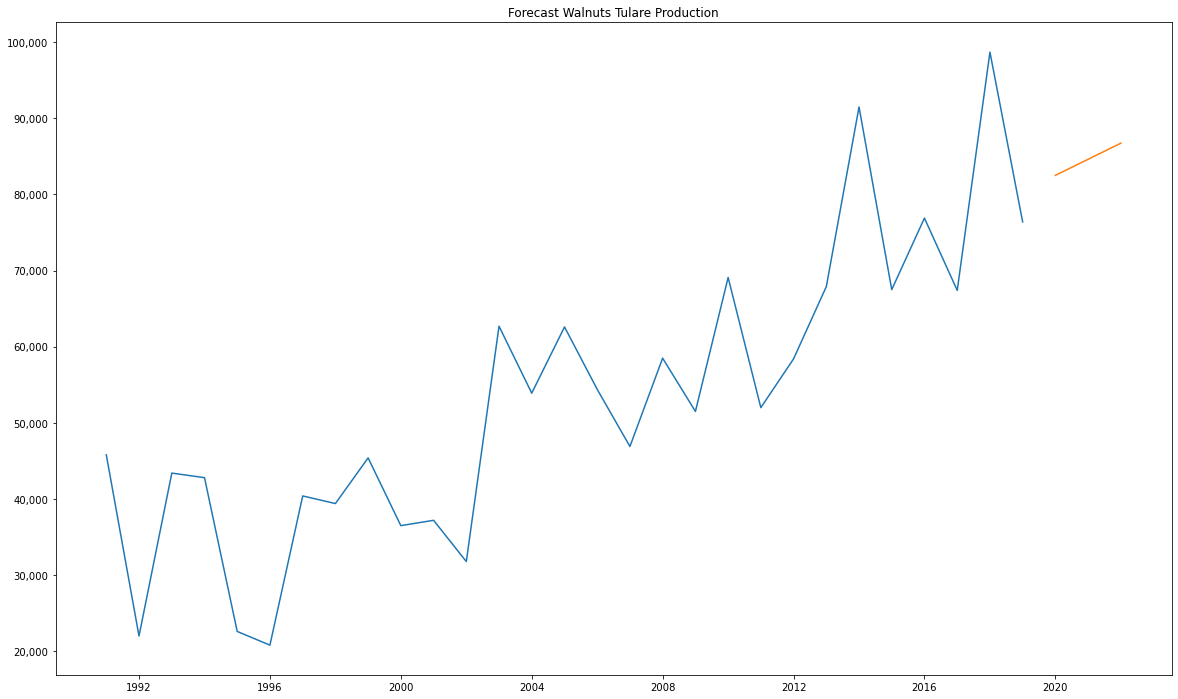

In [227]:
forecast_1 = model_fit.forecast(steps=(3))

fig, ax = plt.subplots(figsize=(20,12))

ax.plot(tulare_nuts['Production'], label='original')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Forecast Walnuts Tulare Production')
plt.savefig('Walnuts - Tulare - 3.png')
ax.plot(forecast_1, label='test_pred')


## Conclusion

When compared to testing(13,011) data agianst training data (14,665) and our naive of (19,581), meaning that our model is effective predicting annual production with a range of a few hundred

# Merced Nuts

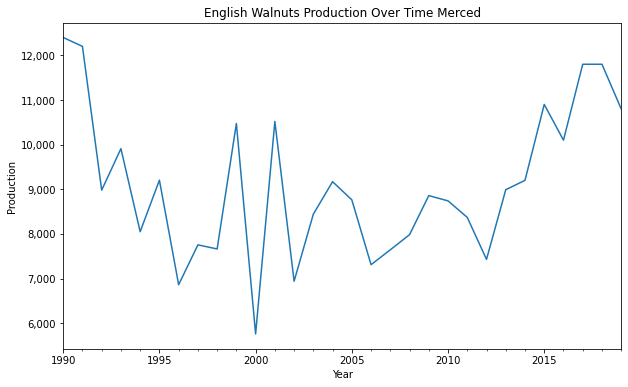

In [228]:
# Convert the 'Year' column to datetime
mer_nuts['Year'] = pd.to_datetime(mer_nuts['Year'], format='%Y')

# Set the 'Year' column as the index
mer_nuts.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(mer_nuts['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
time_series.plot()
plt.xlabel('Year')
plt.ylabel('Production')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('English Walnuts Production Over Time Merced')
plt.savefig('Walnuts - Merced - 1.png')
plt.show()



# AdFuller

In [229]:
# Perform Augmented Dickey-Fuller test
result = adfuller(mer_nuts['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -2.4152386054337978
p-value: 0.1374815354531742


In [230]:
adfuller(mer_nuts['Production'].diff()[1:])

(-11.74243471574494,
 1.264312941959771e-21,
 0,
 28,
 {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224},
 322.27768636311947)

In [231]:
p_val = adfuller(mer_nuts['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 1.264312941959771e-21,
 so we can safely assume that the differenced data is stationary.


# ACF & PACF

In [232]:
mer_nuts.drop(['County', 'Crop Name'], axis=1, inplace=True)

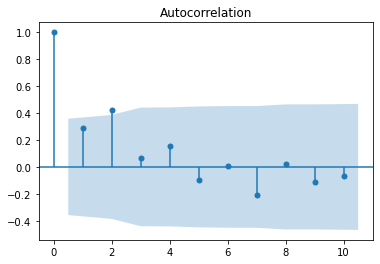

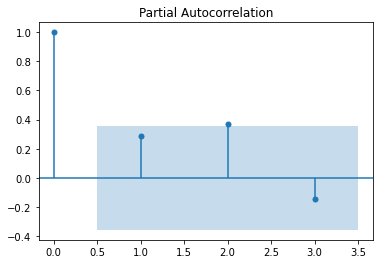

In [233]:
plot_acf(mer_nuts, lags=10);
plot_pacf(mer_nuts,lags=3, method='ywm');

# Stationary and Test Split

In [234]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(mer_nuts['Production'])

# Split the data using ttsplit
train, test = ttsplit(mer_nuts['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

False

Train Data:
Year
1990-01-01    12400.0
1991-01-01    12200.0
1992-01-01     8980.0
1993-01-01     9910.0
1994-01-01     8050.0
1995-01-01     9204.0
1996-01-01     6862.0
1997-01-01     7755.0
1998-01-01     7663.0
1999-01-01    10473.0
2000-01-01     5759.0
2001-01-01    10519.0
2002-01-01     6940.0
2003-01-01     8443.0
2004-01-01     9170.0
2005-01-01     8763.0
2006-01-01     7311.0
2007-01-01     7644.0
2008-01-01     7983.0
2009-01-01     8858.0
2010-01-01     8740.0
2011-01-01     8370.0
2012-01-01     7430.0
2013-01-01     8990.0
2014-01-01     9200.0
2015-01-01    10900.0
2016-01-01    10100.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    11800.0
2018-01-01    11800.0
2019-01-01    10800.0
Name: Production, dtype: float64


# ARIMA

In [235]:
#Finding Ideal P,D,Q

def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 458.3978493241067
P of:  0
d of:  1
q of:  1


In [236]:
#Model Test
model = ARIMA(train, order=(0, 1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -227.199
Date:                Thu, 01 Jun 2023   AIC                            458.398
Time:                        06:16:06   BIC                            460.914
Sample:                    01-01-1990   HQIC                           459.122
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9991      0.308     -3.241      0.001      -1.603      -0.395
sigma2      1.894e+06   1.64e-07   1.16e+13      0.000    1.89e+06    1.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.42   Prob(JB):                         0.67
Heteroskedasticity (H):               0.40   Skew:                             0.41
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.01e+28. Standard errors may be unstable.
"""

In [237]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Modeling

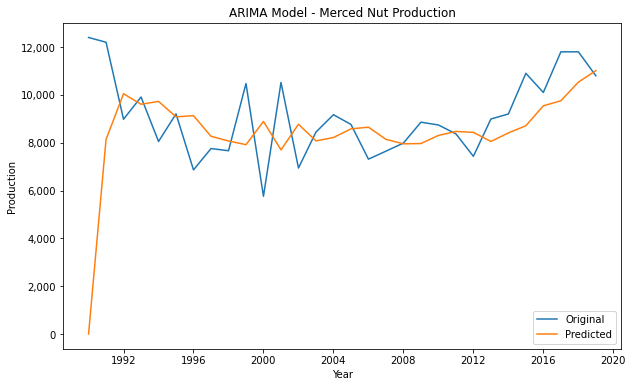

In [238]:
# Fit an ARIMA model to the training data
model = ARIMA(mer_nuts['Production'], order=(0, 1, 1))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(mer_nuts['Production'], label='Original')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('ARIMA Model - Merced Nut Production')
plt.legend()
plt.savefig('Walnuts -  Merced - 2.png')
plt.show()



# Validation 

In [239]:
#Training Model on Ideal PDQ
model = ARIMA(train, order=(0, 1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -227.199
Date:                Thu, 01 Jun 2023   AIC                            458.398
Time:                        06:16:06   BIC                            460.914
Sample:                    01-01-1990   HQIC                           459.122
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9991      0.308     -3.241      0.001      -1.603      -0.395
sigma2      1.894e+06   1.64e-07   1.16e+13      0.000    1.89e+06    1.89e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.42   Prob(JB):                         0.67
Heteroskedasticity (H):               0.40   Skew:                             0.41
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.01e+28. Standard errors may be unstable.
"""

In [240]:
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [241]:
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

3664.0786722338494

# Cross Test Validation

In [242]:
train.index
train_with_ind = train.reset_index()

In [243]:
#Splitting

split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [244]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

1874.4637539368084
2526.592898175758
1187.8393842083385
732.2189276587017
2233.102259023069


In [245]:
ar_1.arparams

array([-1.18294671, -0.53512695])

In [246]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()

ar_2.predict(typ='levels')

1990-01-01        0.000000
1991-01-01    18793.405371
1992-01-01    15034.663555
1993-01-01    12680.163954
1994-01-01    14743.608689
1995-01-01     9252.513914
1996-01-01    12578.252875
1997-01-01     8397.321047
1998-01-01     9053.489677
1999-01-01     9897.174568
2000-01-01     8920.035319
2001-01-01     8335.537406
2002-01-01    10070.606632
2003-01-01     7907.735434
2004-01-01     8738.891301
2005-01-01    10077.458881
2006-01-01     7528.719232
2007-01-01     9431.956768
2008-01-01     7825.524649
2009-01-01     8460.881180
2010-01-01     9332.157836
2011-01-01     7779.990699
2012-01-01     9361.172657
2013-01-01     7580.894244
2014-01-01     9145.046445
2015-01-01     9165.759171
2016-01-01     9027.384061
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [247]:
#Different Values for Different PDQ's
print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

458.3978493241067
471.0082667562498
471.0082667562498


In [248]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

3664.0786722338494

In [249]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

1775.3547542981298
2418.5429260382357
966.0269937852555
800.4345892850121
2069.916725880748


In [250]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [251]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [252]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [253]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))


In [254]:
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

2067.5831984131155
2067.5831984131155
2638.5163928086026
2067.5831984131155


# Predictions and RMSE

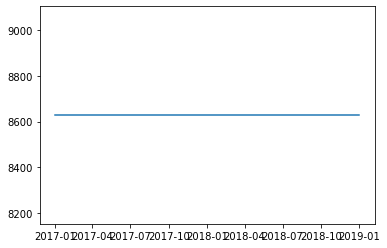

In [255]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots()
ax.plot(y_hat_test);

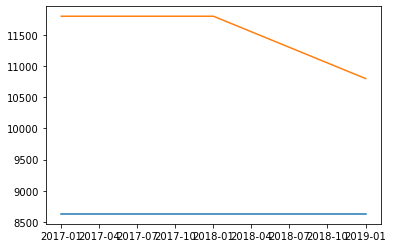

In [256]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);

In [257]:
np.sqrt(mean_squared_error(test, y_hat_test))

2876.9494920056127

## Naive Shifted 

In [258]:
# Shift the 'Production' column by one period to create a naive shifted model
mer_nuts['Production_shifted'] = mer_nuts['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
mer_nuts.dropna(inplace=True)

# Print the modified DataFrame
print(fres_grapes)

       Year    Crop Name  County  Production
1209   1990  GRAPES WINE  Fresno    346750.0
3955   1991  GRAPES WINE  Fresno    304780.0
6714   1992  GRAPES WINE  Fresno    825100.0
9531   1993  GRAPES WINE  Fresno    667100.0
12309  1994  GRAPES WINE  Fresno    395800.0
15017  1995  GRAPES WINE  Fresno    643400.0
17714  1996  GRAPES WINE  Fresno    737490.0
20419  1997  GRAPES WINE  Fresno    978930.0
23112  1998  GRAPES WINE  Fresno    760130.0
25801  1999  GRAPES WINE  Fresno    693910.0
28412  2000  GRAPES WINE  Fresno    835310.0
30894  2001  GRAPES WINE  Fresno    639180.0
33233  2002  GRAPES WINE  Fresno    928100.0
35513  2003  GRAPES WINE  Fresno    728500.0
37834  2004  GRAPES WINE  Fresno    871000.0
40254  2005  GRAPES WINE  Fresno    878500.0
42696  2006  GRAPES WINE  Fresno    566400.0
45069  2007  GRAPES WINE  Fresno    722800.0
47388  2008  GRAPES WINE  Fresno   1040100.0
49735  2009  GRAPES WINE  Fresno    803560.0
52043  2010  GRAPES WINE  Fresno    883000.0
54335  201

In [259]:
# Create the feature matrix X and target variable y
X = mer_nuts[['Production_shifted']]
y = mer_nuts['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1913.417119372367


# Forecast

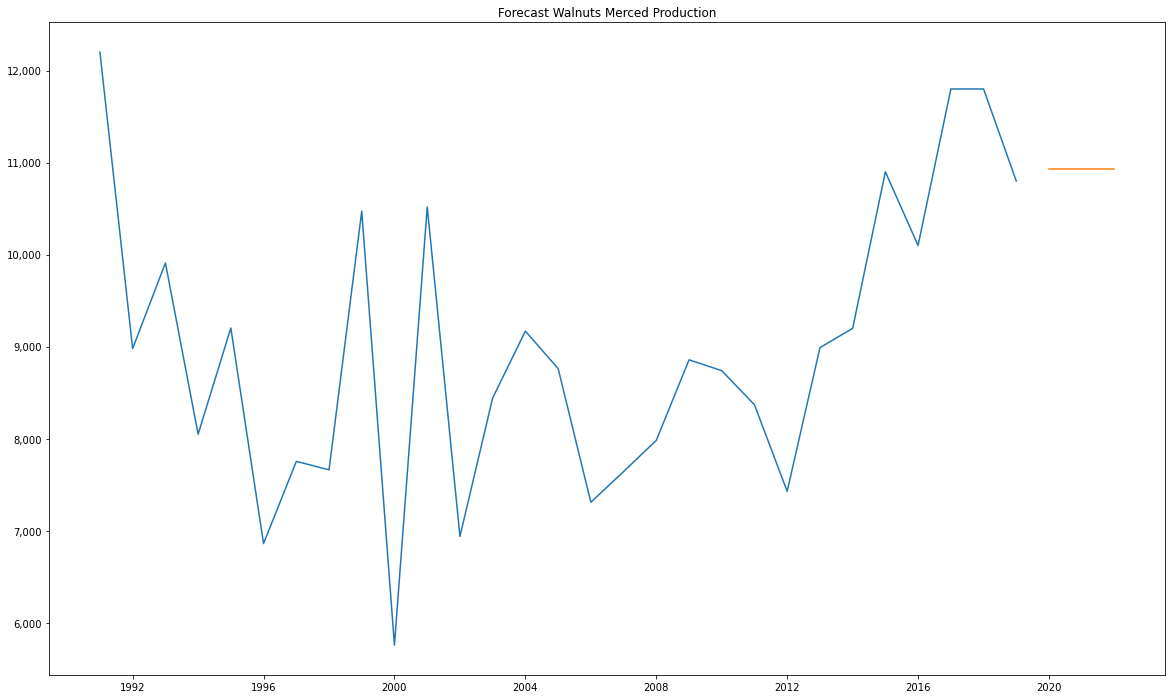

In [260]:
forecast_1 = model_fit.forecast(steps=(3))

fig, ax = plt.subplots(figsize=(20,12))
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Forecast Walnuts Merced Production')
ax.plot(mer_nuts['Production'], label='original')
plt.savefig('Walnuts - Merced - 3.png')
ax.plot(forecast_1, label='test_pred');


## Conclusion: 

When compared to testing(2,876) data agianst training data (3,664), and our naive model of (1,913) meaning that our model is effective predicting annual production with a range of a few thousand

# Grapes 

## San Jaoiquin

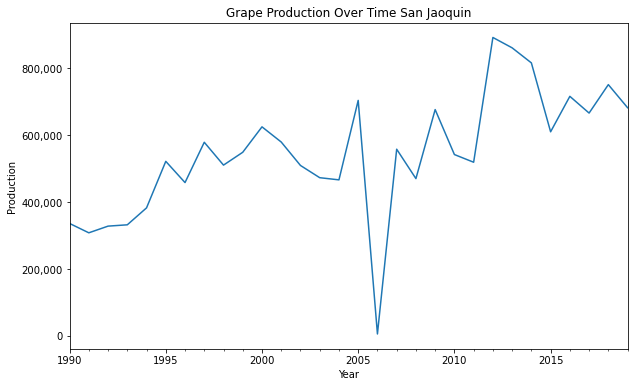

In [261]:
# Convert the 'Year' column to datetime
san_grapes['Year'] = pd.to_datetime(san_grapes['Year'], format='%Y')

# Set the 'Year' column as the index
san_grapes.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(san_grapes['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
time_series.plot()
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Grape Production Over Time San Jaoquin')
plt.savefig('Grapes - San - 1.png')
plt.show()


# AdFuller

In [262]:
# Perform Augmented Dickey-Fuller test
result = adfuller(san_grapes['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -2.0217520613084323
p-value: 0.2771177647418678


In [263]:
adfuller(san_grapes['Production'].diff()[1:])

(-10.220820263190838,
 5.3307153438343024e-18,
 0,
 28,
 {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224},
 520.6721388838921)

In [264]:
p_val = adfuller(san_grapes['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 5.3307153438343024e-18,
 so we can safely assume that the differenced data is stationary.


# ACF & PACF

In [265]:
san_grapes.drop(['County', 'Crop Name'], axis=1, inplace=True)

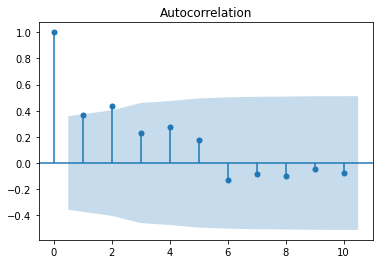

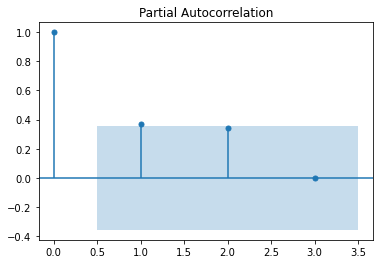

In [266]:
plot_acf(san_grapes, lags=10);
plot_pacf(san_grapes,lags=3, method='ywm');

# Stationary and Test Split

In [267]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(san_grapes['Production'])

# Split the data using ttsplit
train, test = ttsplit(san_grapes['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

False

Train Data:
Year
1990-01-01    336000.0
1991-01-01    308040.0
1992-01-01    328000.0
1993-01-01    331950.0
1994-01-01    382600.0
1995-01-01    521700.0
1996-01-01    458200.0
1997-01-01    578700.0
1998-01-01    510400.0
1999-01-01    548800.0
2000-01-01    624800.0
2001-01-01    579400.0
2002-01-01    509355.0
2003-01-01    472800.0
2004-01-01    466331.0
2005-01-01    703870.0
2006-01-01      5610.0
2007-01-01    557950.0
2008-01-01    470060.0
2009-01-01    676410.0
2010-01-01    542000.0
2011-01-01    519000.0
2012-01-01    892000.0
2013-01-01    861000.0
2014-01-01    816000.0
2015-01-01    610000.0
2016-01-01    716000.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    666000.0
2018-01-01    751000.0
2019-01-01    682000.0
Name: Production, dtype: float64


# ARIMA

In [268]:
#Finding Ideal P,D,Q

def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 681.9958483382854
P of:  4
d of:  2
q of:  0


In [269]:
#Model Test
model = ARIMA(train, order=(4, 2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -335.998
Date:                Thu, 01 Jun 2023   AIC                            681.996
Time:                        06:16:13   BIC                            688.090
Sample:                    01-01-1990   HQIC                           683.686
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4704      0.123    -11.946      0.000      -1.712      -1.229
ar.L2         -1.4183      0.273     -5.191      0.000      -1.954      -0.883
ar.L3         -1.2348      0.349     -3.535      0.000      -1.919      -0.550
ar.L4         -0.6585      0.319     -2.066      0.039      -1.283      -0.034
sigma2       2.87e+10    2.6e-11    1.1e+21      0.000    2.87e+10    2.87e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 4.01
Prob(Q):                              0.45   Prob(JB):                         0.13
Heteroskedasticity (H):               2.25   Skew:                            -0.60
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.07e+36. Standard errors may be unstable.
"""

In [270]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Model

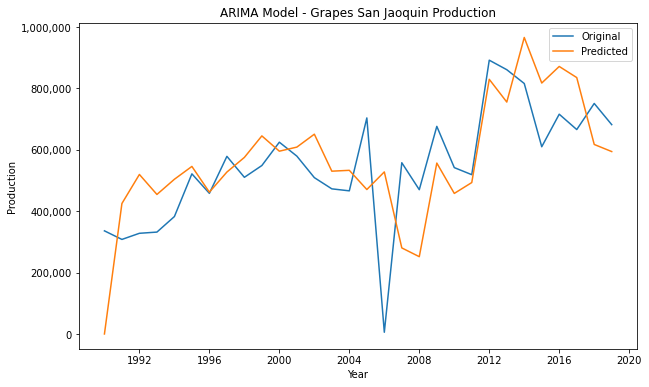

In [271]:
# Fit an ARIMA model to the training data
model = ARIMA(san_grapes['Production'], order=(4, 2, 0))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(san_grapes['Production'], label='Original')
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('ARIMA Model - Grapes San Jaoquin Production')
plt.legend()
plt.savefig('Grapes - San - 2.png')
plt.show()


# Validation - 1

In [272]:
#Training Model on Ideal PDQ
model = ARIMA(train, order=(4, 2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -335.998
Date:                Thu, 01 Jun 2023   AIC                            681.996
Time:                        06:16:14   BIC                            688.090
Sample:                    01-01-1990   HQIC                           683.686
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4704      0.123    -11.946      0.000      -1.712      -1.229
ar.L2         -1.4183      0.273     -5.191      0.000      -1.954      -0.883
ar.L3         -1.2348      0.349     -3.535      0.000      -1.919      -0.550
ar.L4         -0.6585      0.319     -2.066      0.039      -1.283      -0.034
sigma2       2.87e+10    2.6e-11    1.1e+21      0.000    2.87e+10    2.87e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 4.01
Prob(Q):                              0.45   Prob(JB):                         0.13
Heteroskedasticity (H):               2.25   Skew:                            -0.60
Prob(H) (two-sided):                  0.27   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.07e+36. Standard errors may be unstable.
"""

In [273]:
#Fitting
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [274]:
#Predicting MSRE before Cross Validation
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

184156.4686216616

# Cross Test Validation

In [275]:
train.index
train_with_ind = train.reset_index()

In [276]:
#Splitting

split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [277]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

110645.56385863287
115857.46246877976
263265.4919378921
212488.63025350508
116477.77502186447


In [278]:
ar_1.arparams

array([-0.76274348, -0.55234186])

In [279]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()

ar_2.predict(typ='levels')

1990-01-01         0.000000
1991-01-01    419965.485016
1992-01-01    530279.126541
1993-01-01    436212.987284
1994-01-01    448904.918517
1995-01-01    518613.800634
1996-01-01    554474.668975
1997-01-01    570920.434057
1998-01-01    620513.278609
1999-01-01    625904.464291
2000-01-01    593651.145462
2001-01-01    665443.455440
2002-01-01    669553.226785
2003-01-01    554548.807021
2004-01-01    530828.753864
2005-01-01    523420.489893
2006-01-01    594411.138923
2007-01-01    301457.302574
2008-01-01    248321.590587
2009-01-01    606443.866564
2010-01-01    519976.801553
2011-01-01    462943.206121
2012-01-01    624109.054251
2013-01-01    756383.307828
2014-01-01    863906.849500
2015-01-01    879395.885770
2016-01-01    754260.225894
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [280]:
#Different Values for Different PDQ's

print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

681.9958483382854
694.5318770587199
694.5318770587199


In [281]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

184156.4686216616

In [282]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

107510.86745266379
129476.27221815653
262802.8774149755
335229.7337979679
148255.91622343974


In [283]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [284]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [285]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [286]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))

In [287]:
#The Final Evaluation with Everything
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

96599.7588455863
96599.7588455863
165052.41520183167
96599.7588455863


# Predictions and RMSE

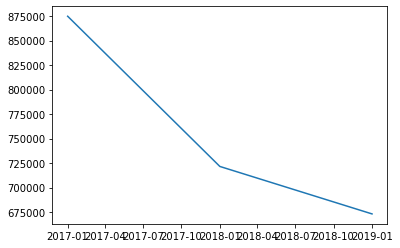

In [288]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots()
ax.plot(y_hat_test);

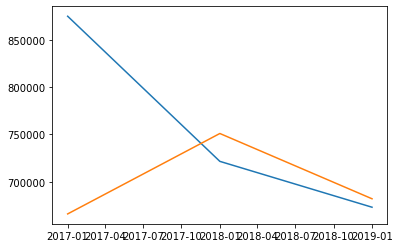

In [289]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);

In [290]:
np.sqrt(mean_squared_error(test, y_hat_test))

121919.84441858604

## Naive Shifted 

In [291]:
# Shift the 'Production' column by one period to create a naive shifted model
san_grapes['Production_shifted'] = san_grapes['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
san_grapes.dropna(inplace=True)

# Print the modified DataFrame
print(fres_grapes)

       Year    Crop Name  County  Production
1209   1990  GRAPES WINE  Fresno    346750.0
3955   1991  GRAPES WINE  Fresno    304780.0
6714   1992  GRAPES WINE  Fresno    825100.0
9531   1993  GRAPES WINE  Fresno    667100.0
12309  1994  GRAPES WINE  Fresno    395800.0
15017  1995  GRAPES WINE  Fresno    643400.0
17714  1996  GRAPES WINE  Fresno    737490.0
20419  1997  GRAPES WINE  Fresno    978930.0
23112  1998  GRAPES WINE  Fresno    760130.0
25801  1999  GRAPES WINE  Fresno    693910.0
28412  2000  GRAPES WINE  Fresno    835310.0
30894  2001  GRAPES WINE  Fresno    639180.0
33233  2002  GRAPES WINE  Fresno    928100.0
35513  2003  GRAPES WINE  Fresno    728500.0
37834  2004  GRAPES WINE  Fresno    871000.0
40254  2005  GRAPES WINE  Fresno    878500.0
42696  2006  GRAPES WINE  Fresno    566400.0
45069  2007  GRAPES WINE  Fresno    722800.0
47388  2008  GRAPES WINE  Fresno   1040100.0
49735  2009  GRAPES WINE  Fresno    803560.0
52043  2010  GRAPES WINE  Fresno    883000.0
54335  201

In [292]:
# Create the feature matrix X and target variable y
X = san_grapes[['Production_shifted']]
y = san_grapes['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 151745.72257738825


# Forecast

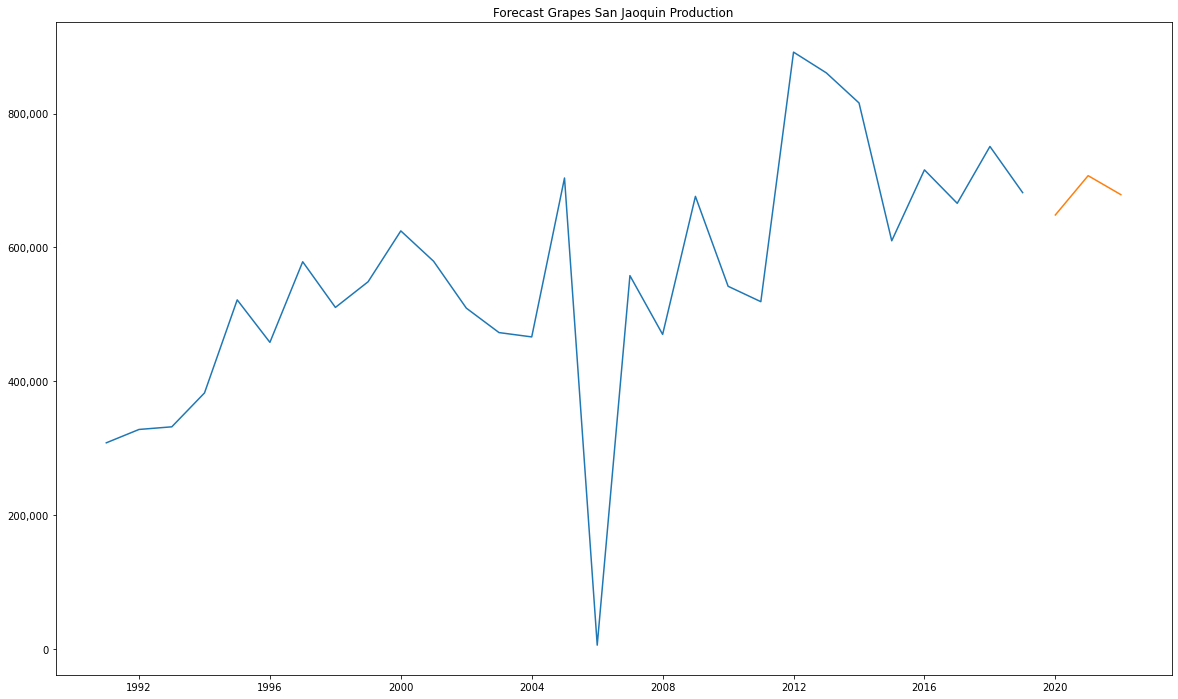

In [293]:
forecast_1 = model_fit.forecast(steps=(3))

fig, ax = plt.subplots(figsize=(20,12))

plt.title('Forecast Grapes San Jaoquin Production')
ax.plot(san_grapes['Production'], label='original')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig('Grapes - San - 3.png')
ax.plot(forecast_1, label='test_pred');


## Conclusion

When compared to testing(121,919) data agianst training data (184,156) and naive (151,745) , meaning that our model is effective predicting annual production with a range of a few thousand


# Fresno 

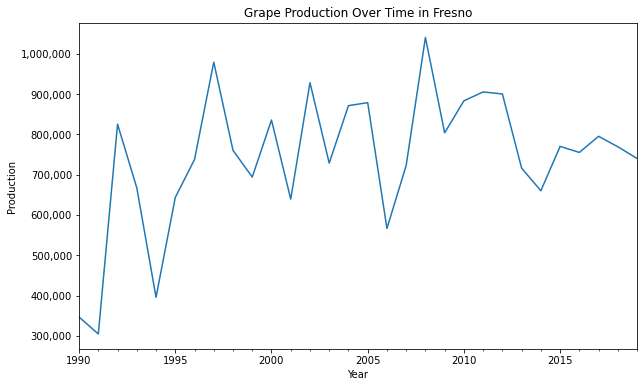

In [294]:
# Convert the 'Year' column to datetime
fres_grapes['Year'] = pd.to_datetime(fres_grapes['Year'], format='%Y')

# Set the 'Year' column as the index
fres_grapes.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(fres_grapes['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
time_series.plot()
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Grape Production Over Time in Fresno')
plt.savefig('Grapes - Fresno - 1.png')
plt.show()


# AdFuller

In [295]:
# Perform Augmented Dickey-Fuller test
result = adfuller(fres_grapes['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -4.460261260577564
p-value: 0.00023183820031276022


In [296]:
adfuller(fres_grapes['Production'].diff()[1:])

(-7.476216005002,
 4.905906782917396e-11,
 1,
 27,
 {'1%': -3.6996079738860943,
  '5%': -2.9764303469999494,
  '10%': -2.627601001371742},
 507.0974703876503)

In [297]:
p_val = adfuller(fres_grapes['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 4.905906782917396e-11,
 so we can safely assume that the differenced data is stationary.


# ACF & PACF

In [298]:
fres_grapes.drop(['County', 'Crop Name'], axis=1, inplace=True)

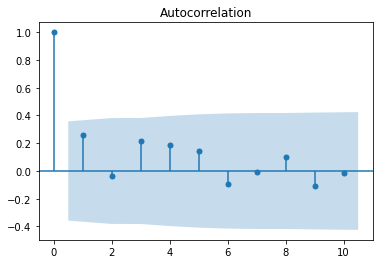

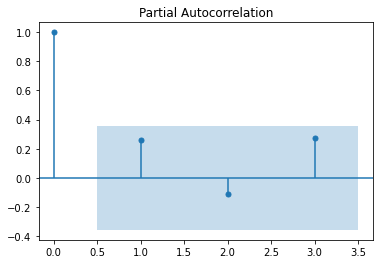

In [299]:
plot_acf(fres_grapes, lags=10);
plot_pacf(fres_grapes,lags=3, method='ywm');

# Stationary and Test Split

In [300]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(fres_grapes['Production'])

# Split the data using ttsplit
train, test = ttsplit(fres_grapes['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

True With a P-Value of 0.00023183820031276022

Lowest P-Value: 0.00023183820031276022
Train Data:
Year
1990-01-01     346750.0
1991-01-01     304780.0
1992-01-01     825100.0
1993-01-01     667100.0
1994-01-01     395800.0
1995-01-01     643400.0
1996-01-01     737490.0
1997-01-01     978930.0
1998-01-01     760130.0
1999-01-01     693910.0
2000-01-01     835310.0
2001-01-01     639180.0
2002-01-01     928100.0
2003-01-01     728500.0
2004-01-01     871000.0
2005-01-01     878500.0
2006-01-01     566400.0
2007-01-01     722800.0
2008-01-01    1040100.0
2009-01-01     803560.0
2010-01-01     883000.0
2011-01-01     905000.0
2012-01-01     900000.0
2013-01-01     716000.0
2014-01-01     660000.0
2015-01-01     770000.0
2016-01-01     755000.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    795000.0
2018-01-01    769000.0
2019-01-01    740000.0
Name: Production, dtype: float64


# ARIMA

In [301]:
#Finding Ideal P,D,Q 
def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 685.9830818467309
P of:  0
d of:  2
q of:  3


In [302]:
#Model Test
model = ARIMA(train, order=(0, 2, 3)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 2, 3)   Log Likelihood                -338.992
Date:                Thu, 01 Jun 2023   AIC                            685.983
Time:                        06:16:24   BIC                            690.859
Sample:                    01-01-1990   HQIC                           687.335
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5544      0.385     -4.038      0.000      -2.309      -0.800
ma.L2          0.6128      0.507      1.208      0.227      -0.382       1.607
ma.L3          0.2184      0.165      1.320      0.187      -0.106       0.543
sigma2       2.71e+10   2.66e-11   1.02e+21      0.000    2.71e+10    2.71e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.89   Prob(JB):                         0.98
Heteroskedasticity (H):               0.27   Skew:                            -0.08
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.6e+36. Standard errors may be unstable.
"""

In [303]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Modeling 

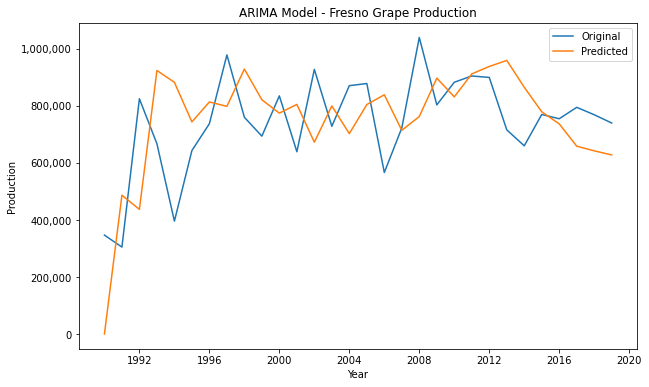

In [304]:
# Fit an ARIMA model to the training data
model = ARIMA(fres_grapes['Production'], order=(0, 2, 3))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(fres_grapes['Production'], label='Original')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('ARIMA Model - Fresno Grape Production')
plt.legend()
plt.savefig('Grapes - Fresno - 2.png')
plt.show()


# Validation

In [305]:
#Training Model on Ideal PDQ
model = ARIMA(train, order=(0, 2, 3)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(0, 2, 3)   Log Likelihood                -338.992
Date:                Thu, 01 Jun 2023   AIC                            685.983
Time:                        06:16:24   BIC                            690.859
Sample:                    01-01-1990   HQIC                           687.335
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5544      0.385     -4.038      0.000      -2.309      -0.800
ma.L2          0.6128      0.507      1.208      0.227      -0.382       1.607
ma.L3          0.2184      0.165      1.320      0.187      -0.106       0.543
sigma2       2.71e+10   2.66e-11   1.02e+21      0.000    2.71e+10    2.71e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.89   Prob(JB):                         0.98
Heteroskedasticity (H):               0.27   Skew:                            -0.08
Prob(H) (two-sided):                  0.08   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.6e+36. Standard errors may be unstable.
"""

In [306]:
#Fitting
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [307]:
#Predicting MSRE before Cross Validation
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

196479.48034111413

# Cross Test Validation

In [308]:
train.index
train_with_ind = train.reset_index()

In [309]:
#Splitting

split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [310]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

144792.4418718238
113354.53125429379
181437.53066908199
91723.24214069145
181182.00252407228


In [311]:
ar_1.arparams

array([-1.55316879, -0.55843699])

In [312]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()

ar_2.predict(typ='levels')

1990-01-01         0.000000
1991-01-01    508933.012232
1992-01-01    387039.927021
1993-01-01    971954.938463
1994-01-01    795867.292967
1995-01-01    802783.321226
1996-01-01    817723.246654
1997-01-01    766156.508461
1998-01-01    956163.214218
1999-01-01    748096.609554
2000-01-01    854730.654511
2001-01-01    753793.855253
2002-01-01    709900.185138
2003-01-01    805186.944552
2004-01-01    678637.273935
2005-01-01    853979.251041
2006-01-01    809721.454177
2007-01-01    718492.293637
2008-01-01    813726.804851
2009-01-01    861497.395233
2010-01-01    820552.010264
2011-01-01    922050.030917
2012-01-01    924380.301132
2013-01-01    950603.816239
2014-01-01    856721.067836
2015-01-01    772106.471359
2016-01-01    763409.825419
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [313]:
#Different Values for different PDQ's
print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

685.9830818467309
689.9509426800523
689.9509426800523


In [314]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

196479.48034111413

In [315]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

164986.16773219453
116844.7615084769
181204.77034998348
40505.679921924566
178857.03193651594


In [316]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [317]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [318]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [319]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))


In [320]:
#The Final Evaluation with everything

print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

241180.33021518125
241180.33021518125
37582.25336185145
241180.33021518125


# Predictions and RMSE

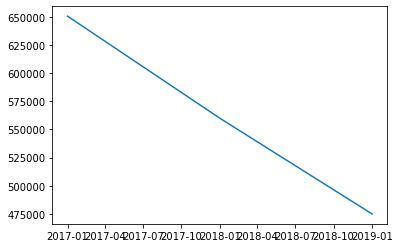

In [321]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots()
ax.plot(y_hat_test);

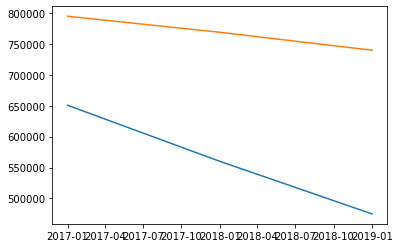

In [322]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);

In [323]:
np.sqrt(mean_squared_error(test, y_hat_test))



211951.27361425175

## Naive Shifted 

In [324]:
# Shift the 'Production' column by one period to create a naive shifted model
fres_grapes['Production_shifted'] = fres_grapes['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
fres_grapes.dropna(inplace=True)

# Print the modified DataFrame
print(fres_grapes)

            Production  Production_shifted
Year                                      
1991-01-01    304780.0            346750.0
1992-01-01    825100.0            304780.0
1993-01-01    667100.0            825100.0
1994-01-01    395800.0            667100.0
1995-01-01    643400.0            395800.0
1996-01-01    737490.0            643400.0
1997-01-01    978930.0            737490.0
1998-01-01    760130.0            978930.0
1999-01-01    693910.0            760130.0
2000-01-01    835310.0            693910.0
2001-01-01    639180.0            835310.0
2002-01-01    928100.0            639180.0
2003-01-01    728500.0            928100.0
2004-01-01    871000.0            728500.0
2005-01-01    878500.0            871000.0
2006-01-01    566400.0            878500.0
2007-01-01    722800.0            566400.0
2008-01-01   1040100.0            722800.0
2009-01-01    803560.0           1040100.0
2010-01-01    883000.0            803560.0
2011-01-01    905000.0            883000.0
2012-01-01 

In [325]:
# Create the feature matrix X and target variable y
X = fres_grapes[['Production_shifted']]
y = fres_grapes['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 71343.92372739463


# Forecast

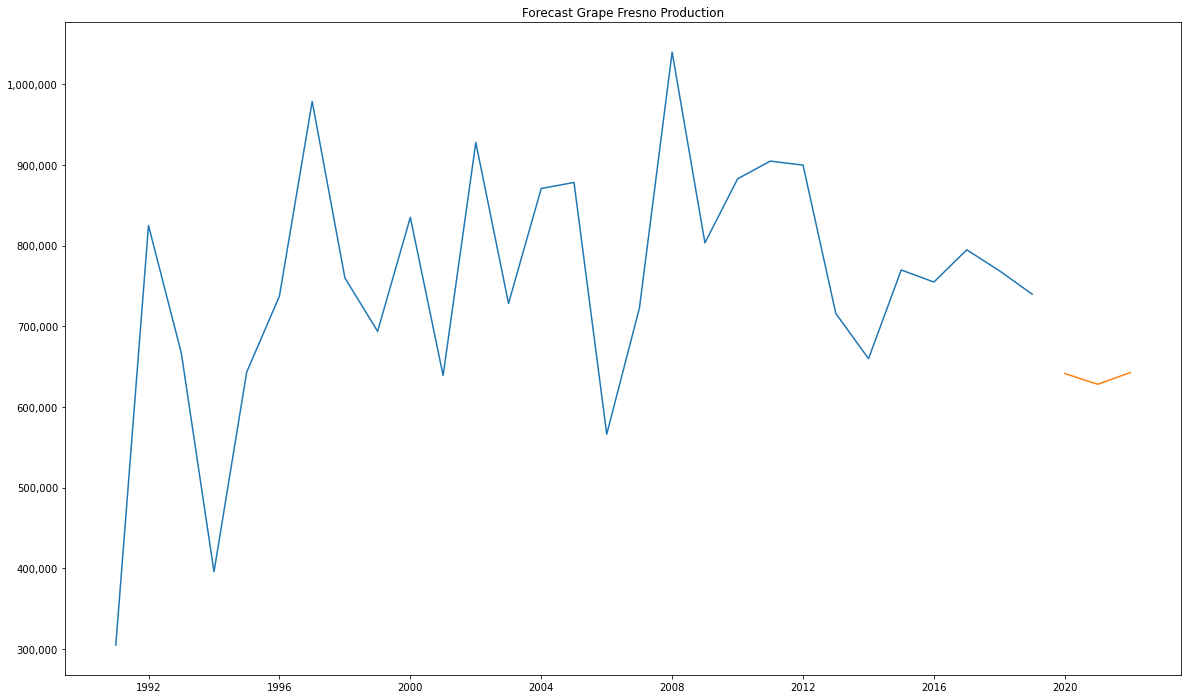

In [326]:
forecast_1 = model_fit.forecast(steps=(3))

fig, ax = plt.subplots(figsize=(20,12))

plt.title('Forecast Grape Fresno Production')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.plot(fres_grapes['Production'], label='original')
plt.savefig('Grapes - San - 3.png')
ax.plot(forecast_1, label='test_pred')


## Conclusion

When compared to testing(211,951) data agianst training data (196,479) however the Naive data gave us our best results (71,343) , meaning that our model is effective predicting annual production with a range of a few thousand

# Merced

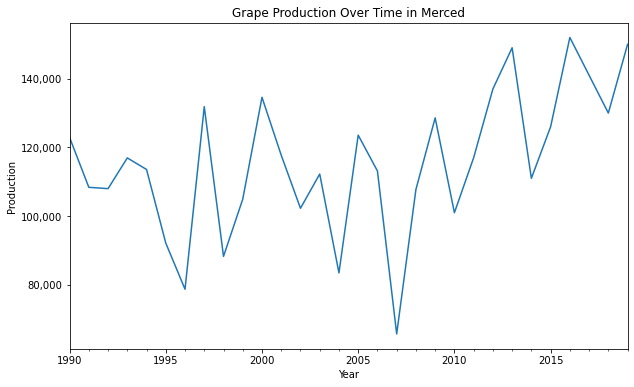

In [327]:
# Convert the 'Year' column to datetime
mer_grapes['Year'] = pd.to_datetime(mer_grapes['Year'], format='%Y')

# Set the 'Year' column as the index
mer_grapes.set_index('Year', inplace=True)

# Create the time series using the 'Production' column
time_series = pd.Series(mer_grapes['Production'])

# Plot the time series
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
time_series.plot()
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Grape Production Over Time in Merced')
plt.savefig('Grape - Merced - 1.png')
plt.show()


# AdFuller

In [328]:
# Perform Augmented Dickey-Fuller test
result = adfuller(mer_grapes['Production'])

# Extract test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -0.7601115663307719
p-value: 0.8305591985130729


In [329]:
adfuller(mer_grapes['Production'].diff()[1:])

(-9.252565934064137,
 1.4787098503011624e-15,
 1,
 27,
 {'1%': -3.6996079738860943,
  '5%': -2.9764303469999494,
  '10%': -2.627601001371742},
 429.4593162589667)

In [330]:
p_val = adfuller(mer_grapes['Production'].diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 1.4787098503011624e-15,
 so we can safely assume that the differenced data is stationary.


# ACF & PACF

In [331]:
mer_grapes.drop(['County', 'Crop Name'], axis=1, inplace=True)

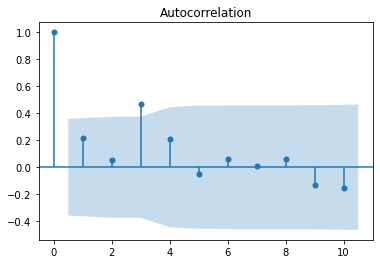

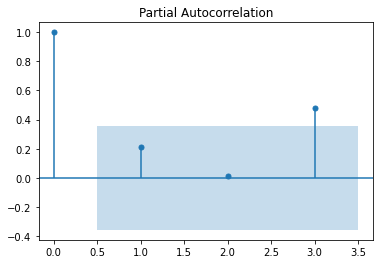

In [332]:
plot_acf(mer_grapes, lags=10);
plot_pacf(mer_grapes,lags=3, method='ywm');

# Stationary and Test Split

In [333]:
def stationary(*args):
    pv = []
    for data in args:
        if adfuller(data)[1] < 0.05:
            print(f'{adfuller(data)[1] < 0.05} With a P-Value of {adfuller(data)[1]}\n')
            pv.append(adfuller(data)[1])
        else:
            print(f'{False}\n')
    if pv:
        print(f'Lowest P-Value: {min(pv)}')

def ttsplit(data):
    cutoff = round(data.shape[0] * 0.9)
    # Creating train and test
    train = data[:cutoff]
    test = data[cutoff:]
    return train, test

# Apply the stationary function to the relevant data in con_grapes
stationary(mer_grapes['Production'])

# Split the data using ttsplit
train, test = ttsplit(mer_grapes['Production'])

# Print the train and test data
print('Train Data:')
print(train)
print('\nTest Data:')
print(test)

False

Train Data:
Year
1990-01-01    122900.0
1991-01-01    108389.0
1992-01-01    108000.0
1993-01-01    116940.0
1994-01-01    113580.0
1995-01-01     92151.0
1996-01-01     78725.0
1997-01-01    131857.0
1998-01-01     88283.0
1999-01-01    104938.0
2000-01-01    134583.0
2001-01-01    117727.0
2002-01-01    102284.0
2003-01-01    112253.0
2004-01-01     83485.0
2005-01-01    123574.0
2006-01-01    113138.0
2007-01-01     65702.0
2008-01-01    107757.0
2009-01-01    128596.0
2010-01-01    101000.0
2011-01-01    117000.0
2012-01-01    137000.0
2013-01-01    149000.0
2014-01-01    111000.0
2015-01-01    126000.0
2016-01-01    152000.0
Name: Production, dtype: float64

Test Data:
Year
2017-01-01    141000.0
2018-01-01    130000.0
2019-01-01    150000.0
Name: Production, dtype: float64


# ARIMA

In [334]:
#Finding Ideal P,D,Q 

def pdq_fitting(data, convergenceWarning=False, summary=False):
    '''
    Function loops through finding the best p, d, q sequence
    convergenceWarning: True = ignore convergence warnings, False = don't ignore
    Summary: print for each pdq check
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try, except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergenceWarning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(data, order=(p, d, q)).fit()
                    # If there is a warning, remove
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    # No Warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("P of: ", p)
                            print("d of: ", d)
                            print("q of: ", q)
                            print("AIC score: ", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    print(f"Best p, d, q for lowest AIC score: {results[0][0]}")
    print("P of: ", results[0][1])
    print("d of: ", results[0][2])
    print("q of: ", results[0][3])

# Apply the pdq_fitting function to the 'Production' column in con_grapes
pdq_fitting(train)

Best p, d, q for lowest AIC score: 590.0605247602857
P of:  2
d of:  2
q of:  1


In [335]:
#Model Test
model = ARIMA(train, order=(2, 2, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -291.030
Date:                Thu, 01 Jun 2023   AIC                            590.061
Time:                        06:16:34   BIC                            594.936
Sample:                    01-01-1990   HQIC                           591.413
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2493      0.171     -1.461      0.144      -0.584       0.085
ar.L2         -0.4060      0.235     -1.730      0.084      -0.866       0.054
ma.L1         -1.0000      0.387     -2.582      0.010      -1.759      -0.241
sigma2      6.775e+08   5.72e-10   1.19e+18      0.000    6.78e+08    6.78e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 1.85
Prob(Q):                              0.35   Prob(JB):                         0.40
Heteroskedasticity (H):               0.19   Skew:                            -0.09
Prob(H) (two-sided):                  0.03   Kurtosis:                         1.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+33. Standard errors may be unstable.
"""

In [336]:
def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data,order= pdq).fit()
    print(arma.mle_retvals)
    print(arma.summary())
    arma.plot_diagnostics(figsize=(8, 4))
    return arma

# Modeling 

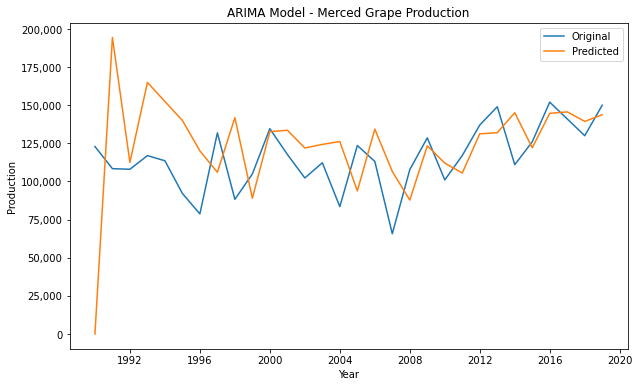

In [337]:
# Fit an ARIMA model to the training data
model = ARIMA(mer_grapes['Production'], order=(2, 2, 1))
model_fit = model.fit()

# Generate predictions for the test data
predictions = model_fit.predict()

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(mer_grapes['Production'], label='Original')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.plot(predictions, label='Predicted')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('ARIMA Model - Merced Grape Production')
plt.legend()
plt.savefig('Grape - Merced - 2.png')
plt.show()


# Validation

In [338]:
#Training Model on Ideal PDQ
model = ARIMA(train, order=(2, 2, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Production   No. Observations:                   27
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -291.030
Date:                Thu, 01 Jun 2023   AIC                            590.061
Time:                        06:16:34   BIC                            594.936
Sample:                    01-01-1990   HQIC                           591.413
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2493      0.171     -1.461      0.144      -0.584       0.085
ar.L2         -0.4060      0.235     -1.730      0.084      -0.866       0.054
ma.L1         -1.0000      0.387     -2.582      0.010      -1.759      -0.241
sigma2      6.775e+08   5.72e-10   1.19e+18      0.000    6.78e+08    6.78e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 1.85
Prob(Q):                              0.35   Prob(JB):                         0.40
Heteroskedasticity (H):               0.19   Skew:                            -0.09
Prob(H) (two-sided):                  0.03   Kurtosis:                         1.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.88e+33. Standard errors may be unstable.
"""

In [339]:
#Fitting
ar_1 = ARIMA(train, order=(2, 2, 4)).fit()

In [340]:
#Predicitng MSRE before Cross Validation
y_hat_ar1 = ar_1.predict(typ='levels')
mean_squared_error(train, y_hat_ar1, squared=False)

37924.32085190135

# Cross Test Validation

In [341]:
train.index
train_with_ind = train.reset_index()

In [342]:
#Splitting
split = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_ind, val_ind in split.split(train_with_ind):
    print(train_ind, val_ind)

[0 1 2 3 4 5 6] [ 7  8  9 10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] [15 16 17 18]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] [19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22] [23 24 25 26]


In [343]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(1, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

39964.148512718566
28333.376214595868
25481.28890503651
27665.0456598912
17351.3835746356


In [344]:
ar_1.arparams

array([ 0.04461671, -0.36578689])

In [345]:
ar_2 = ARIMA(train, order=(2, 2, 4)).fit()

ar_2.predict(typ='levels')

1990-01-01         0.000000
1991-01-01    186566.299850
1992-01-01    123119.648733
1993-01-01    179332.417092
1994-01-01    144107.390969
1995-01-01    120261.647061
1996-01-01     83503.870686
1997-01-01     83730.344859
1998-01-01    137228.731232
1999-01-01    108952.855533
2000-01-01    146236.896946
2001-01-01    124333.502986
2002-01-01    117237.605827
2003-01-01    117271.972828
2004-01-01    124391.895156
2005-01-01     89700.482541
2006-01-01    121574.003275
2007-01-01    103152.541768
2008-01-01     99496.322114
2009-01-01    115145.449606
2010-01-01    103892.507171
2011-01-01    111676.696831
2012-01-01    142028.020827
2013-01-01    143318.957811
2014-01-01    151296.765508
2015-01-01    122625.034408
2016-01-01    134083.422660
Freq: AS-JAN, Name: predicted_mean, dtype: float64

In [346]:
#Different Values for different PDQ's
print(model.aic)
print(ar_1.aic)
print(ar_2.aic)

590.0605247602857
605.544249841166
605.544249841166


In [347]:
y_hat_ar1 = ar_2.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

37924.32085190135

In [348]:
for train_ind, val_ind in split.split(train_with_ind):
    ar = ARIMA(endog=train_with_ind.iloc[train_ind, -1], order=(2, 1, 0)).fit()
    preds = ar.predict(typ='levels', start=val_ind[0], end=val_ind[-1])
    true = train_with_ind.iloc[val_ind, -1]
    print(np.sqrt(mean_squared_error(true, preds)))

39188.60839838507
22842.81172509078
24152.112667238096
25727.253854652812
20022.737132612343


In [349]:
ma_1 = ARIMA(train, order=(0,0,1)).fit()
y_hat = ma_1.predict(typ='levels')

In [350]:
ma_2 = ARIMA(train, order=(2, 2, 4)).fit()
y_hat = ma_2.predict(typ='levels')

In [351]:
def find_rmse_test(model, test_data=test):
    y_hat = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
    return np.sqrt(mean_squared_error(test_data, y_hat))

In [352]:
def find_rmse(model, train_data=train):
    y_hat = model.predict(typ='levels')
    return np.sqrt(mean_squared_error(train_data, y_hat))


In [353]:
#The Final Evaluation with everything
print(find_rmse_test(ar_1))
print(find_rmse_test(ar_2))
print(find_rmse_test(ma_1))
print(find_rmse_test(ma_2))

11026.247618026324
11026.247618026324
27299.840774535387
11026.247618026324


# Predictions and RMSE

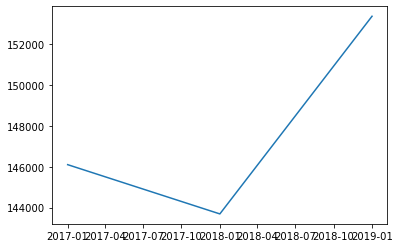

In [354]:
y_hat_test = model.predict(start=test.index[0], end=test.index[-1])

fig, ax = plt.subplots()
ax.plot(y_hat_test);

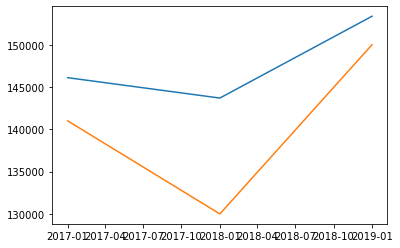

In [355]:
fig, ax = plt.subplots()
ax.plot(y_hat_test)
ax.plot(test);

In [356]:
np.sqrt(mean_squared_error(test, y_hat_test))

8657.56654561531

## Naive Shifted 

In [357]:
# Shift the 'Production' column by one period to create a naive shifted model
mer_grapes['Production_shifted'] = mer_grapes['Production'].shift(1)

# Remove the rows with missing values resulting from the shift
mer_grapes.dropna(inplace=True)

# Print the modified DataFrame
print(mer_grapes)

            Production  Production_shifted
Year                                      
1991-01-01    108389.0            122900.0
1992-01-01    108000.0            108389.0
1993-01-01    116940.0            108000.0
1994-01-01    113580.0            116940.0
1995-01-01     92151.0            113580.0
1996-01-01     78725.0             92151.0
1997-01-01    131857.0             78725.0
1998-01-01     88283.0            131857.0
1999-01-01    104938.0             88283.0
2000-01-01    134583.0            104938.0
2001-01-01    117727.0            134583.0
2002-01-01    102284.0            117727.0
2003-01-01    112253.0            102284.0
2004-01-01     83485.0            112253.0
2005-01-01    123574.0             83485.0
2006-01-01    113138.0            123574.0
2007-01-01     65702.0            113138.0
2008-01-01    107757.0             65702.0
2009-01-01    128596.0            107757.0
2010-01-01    101000.0            128596.0
2011-01-01    117000.0            101000.0
2012-01-01 

In [358]:
# Create the feature matrix X and target variable y
X = mer_grapes[['Production_shifted']]
y = mer_grapes['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 25668.546854796117


# Forecast

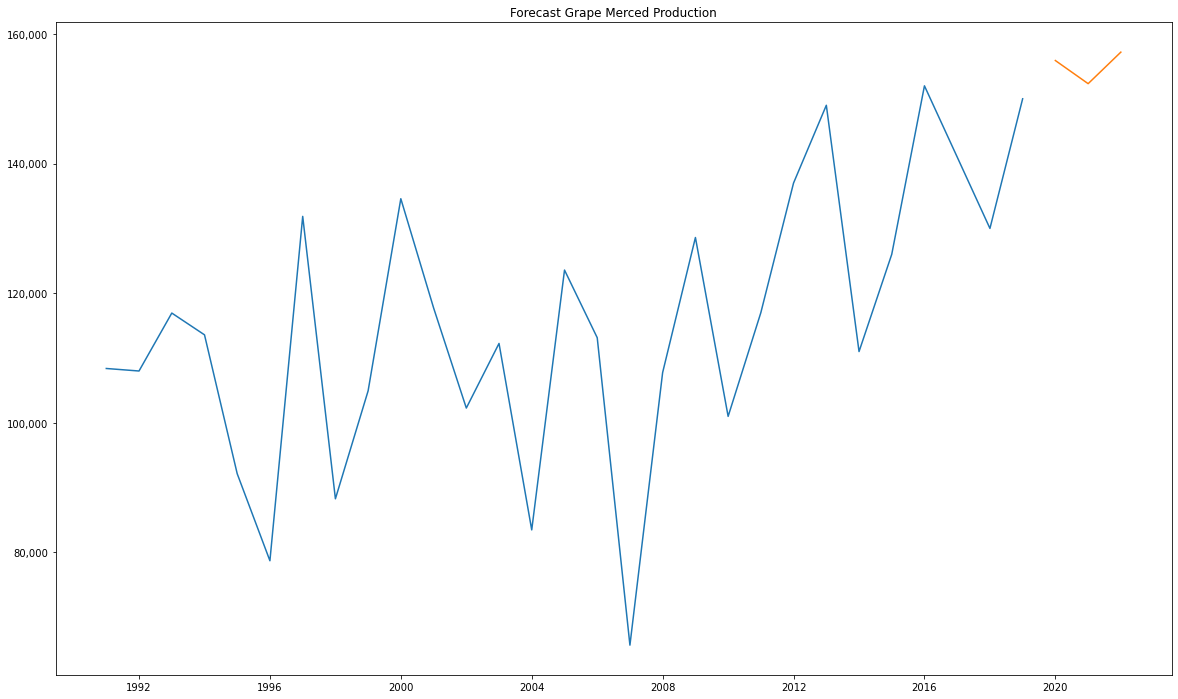

In [359]:
forecast_1 = model_fit.forecast(steps=(3))

fig, ax = plt.subplots(figsize=(20,12))

plt.title('Forecast Grape Merced Production')
plt.ticklabel_format(style='plain', axis='y')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.plot(mer_grapes['Production'], label='original')
plt.savefig('Grape - Merced - 3.png')
ax.plot(forecast_1, label='test_pred');


# Conclusion: 

When compared to testing(8,657) data agianst training data (37,924) and the naive (25,668) , meaning that our model is effective predicting annual production with a range of a few thousand, 

# Final Conclusion on DF_3 Models: 
    
    

The model's were effectively able to predict the average yield of crops when tested agianst the data in a range of 30% and below. For Farmers and Futures Brokers: 

1. Hay Alfalfa Production is Dropping: 
      - Investors: Search for Other Markets to Invest in, look for emerging markets
      - Farmers: Switch from Alfalfa Production
      
      
2. English Walnuts Production is on the Rise: 
      - Investors: Fresno and Tulare are graphed to have a rise in Production, avoid San Joaquin                Investments
      - Farmers: English Walnuts seem to be growing in popularity and yield
      
      
3. Grape Production is Production is on the Rise: 
      - Investors: San Joaquin is stable in growth whereas Merced has a strong trend upward
      - FarmerS: Grapes have a strong predicitve yield and high popularity

# Results of df_1 and df_2

In [360]:
stan_alfalfa

,Production,Production_shifted
Year,,
1991-01-01,310000.0,264000.0
1992-01-01,316000.0,310000.0
1993-01-01,313600.0,316000.0
1994-01-01,316000.0,313600.0
1995-01-01,348000.0,316000.0
1996-01-01,296000.0,348000.0
1997-01-01,278000.0,296000.0
1998-01-01,275000.0,278000.0
1999-01-01,311600.0,275000.0


In [361]:
df_1_Stan 
df_2_Stan

,Location,TimeFrame,Data
798,Stanislaus County,1999,24.9
799,Stanislaus County,2000,18.7
800,Stanislaus County,2001,15.6
801,Stanislaus County,2002,18.7
802,Stanislaus County,2004,13.6
803,Stanislaus County,2003,14.5
804,Stanislaus County,2007,15.0
805,Stanislaus County,2005,13.9
806,Stanislaus County,2006,14.8
807,Stanislaus County,2009,16.1


# Exogenous Models: Stanislauski

In [362]:
df_1_Stan

#Group by year 
#Year from Date
#Associated Proudctivity 

#Pull the year from Sample_Date
#Make that it's own column 
#Group by that year
#Group by with Median
#Connect to production per year
#Pair Plot, Decision Tree or Check for Linear Regression

,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
2,STANISLAUS,3/23/2006,164.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.91,2.328000
3,STANISLAUS,5/3/2006,174.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.40,1.008000
5,STANISLAUS,11/12/2003,622.275229,12.00000,3.950000,18.100000,4.830000,4.450000,0.170000,1.450000,63.650000,95.180000,12.25,0.010000
11,STANISLAUS,11/17/2003,622.275229,15.91000,5.330000,17.580000,5.390000,5.810000,5.690000,1.780000,62.410000,106.030000,13.46,2.154501
12,STANISLAUS,10/17/2002,622.275229,14.86000,4.790000,18.020000,4.940000,6.300000,2.620000,1.680000,64.020000,91.990000,14.71,2.154501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,STANISLAUS,10/22/2015,622.275229,73.72000,128.500000,124.900000,2.620000,303.660000,279.590000,17.660000,22.760000,306.210000,6.93,2.154501
705,STANISLAUS,4/15/2010,622.275229,168.50000,86.700000,99.610000,2.450000,163.580000,554.680000,20.040000,26.430000,94.920000,17.07,2.154501
715,STANISLAUS,3/29/2010,622.275229,127.20000,128.700000,321.000000,3.220000,428.700000,696.230000,1.570000,25.110000,477.660000,4.39,2.154501
716,STANISLAUS,3/18/2010,622.275229,157.90000,112.400000,313.800000,3.860000,429.380000,736.690000,2.600000,24.440000,397.850000,4.95,2.154501


In [363]:
# Convert 'SAMPLE_DATE' column to datetime format
df_1_Stan['SAMPLE_DATE'] = pd.to_datetime(df_1_Stan['SAMPLE_DATE'])
df_1_Fresno['SAMPLE_DATE'] = pd.to_datetime(df_1_Fresno['SAMPLE_DATE'])
df_1_Tulare['SAMPLE_DATE'] = pd.to_datetime(df_1_Tulare['SAMPLE_DATE'])
# Extract the year and create a new column
df_1_Stan['YEAR'] = df_1_Stan['SAMPLE_DATE'].dt.year
df_1_Fresno['YEAR'] = df_1_Fresno['SAMPLE_DATE'].dt.year
df_1_Tulare['YEAR'] = df_1_Tulare['SAMPLE_DATE'].dt.year
df_1_Stan

,COUNTY,SAMPLE_DATE,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU,YEAR
2,STANISLAUS,2006-03-23,164.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.91,2.328000,2006
3,STANISLAUS,2006-05-03,174.000000,55.71354,19.600457,74.600049,3.385726,76.124421,76.850946,6.976951,46.064763,212.625302,25.40,1.008000,2006
5,STANISLAUS,2003-11-12,622.275229,12.00000,3.950000,18.100000,4.830000,4.450000,0.170000,1.450000,63.650000,95.180000,12.25,0.010000,2003
11,STANISLAUS,2003-11-17,622.275229,15.91000,5.330000,17.580000,5.390000,5.810000,5.690000,1.780000,62.410000,106.030000,13.46,2.154501,2003
12,STANISLAUS,2002-10-17,622.275229,14.86000,4.790000,18.020000,4.940000,6.300000,2.620000,1.680000,64.020000,91.990000,14.71,2.154501,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,STANISLAUS,2015-10-22,622.275229,73.72000,128.500000,124.900000,2.620000,303.660000,279.590000,17.660000,22.760000,306.210000,6.93,2.154501,2015
705,STANISLAUS,2010-04-15,622.275229,168.50000,86.700000,99.610000,2.450000,163.580000,554.680000,20.040000,26.430000,94.920000,17.07,2.154501,2010
715,STANISLAUS,2010-03-29,622.275229,127.20000,128.700000,321.000000,3.220000,428.700000,696.230000,1.570000,25.110000,477.660000,4.39,2.154501,2010
716,STANISLAUS,2010-03-18,622.275229,157.90000,112.400000,313.800000,3.860000,429.380000,736.690000,2.600000,24.440000,397.850000,4.95,2.154501,2010


In [364]:
# Group the data by year
grouped_df_1 = df_1_Stan.groupby('YEAR')
grouped_df_2 = df_1_Fresno.groupby('YEAR')
grouped_df_3 = df_1_Tulare.groupby('YEAR')
# Perform operations on the grouped data
# For example, calculate the average value for each parameter per year
df_1_Stan = grouped_df_1.median()
df_1_Fresno = grouped_df_2.median()
df_1_Tulare = grouped_df_3.median()
# Print the average values for each parameter per year
df_1_Stan

,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
YEAR,,,,,,,,,,,,
1995,622.275229,110.00000,29.000000,130.000000,4.900000,34.000000,62.000000,24.000000,61.000000,591.410000,1.280,3.725000
2002,622.275229,49.29000,14.110000,28.990000,3.730000,16.570000,16.980000,5.380000,50.370000,179.690000,15.090,2.154501
2003,622.275229,19.68500,6.905000,25.120000,4.870000,7.030000,11.035000,2.870000,63.455000,129.710000,12.050,1.552250
2004,622.275229,35.87000,10.005000,28.315000,3.980000,8.975000,17.925000,5.000000,66.150000,169.665000,11.625,2.455750
2005,622.275229,69.20000,31.140000,41.340000,2.730000,11.430000,29.910000,6.930000,75.960000,408.170000,8.740,2.154501
2006,622.275229,55.71354,19.600457,74.600049,3.385726,76.124421,64.940473,6.976951,46.064763,212.625302,8.445,2.319500
2010,622.275229,87.97500,57.720000,113.055000,3.085000,184.040000,254.380000,4.275000,28.090000,240.075000,8.330,2.154501
2012,622.275229,73.86000,32.180000,81.450000,3.240000,70.060000,140.330000,12.910000,27.990000,204.290000,9.890,2.154501
2014,622.275229,44.45000,16.640000,34.290000,3.480000,8.800000,17.120000,6.570000,54.980000,216.610000,9.680,4.520000


In [365]:
df_1_Stan = df_1_Stan.rename(columns={'SAMPLE_DATE': 'Year'})
df_1_Fresno = df_1_Fresno.rename(columns={'SAMPLE_DATE': 'Year'})
df_1_Tulare = df_1_Tulare.rename(columns={'SAMPLE_DATE': 'Year'})
df_1_Stan

,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
YEAR,,,,,,,,,,,,
1995,622.275229,110.00000,29.000000,130.000000,4.900000,34.000000,62.000000,24.000000,61.000000,591.410000,1.280,3.725000
2002,622.275229,49.29000,14.110000,28.990000,3.730000,16.570000,16.980000,5.380000,50.370000,179.690000,15.090,2.154501
2003,622.275229,19.68500,6.905000,25.120000,4.870000,7.030000,11.035000,2.870000,63.455000,129.710000,12.050,1.552250
2004,622.275229,35.87000,10.005000,28.315000,3.980000,8.975000,17.925000,5.000000,66.150000,169.665000,11.625,2.455750
2005,622.275229,69.20000,31.140000,41.340000,2.730000,11.430000,29.910000,6.930000,75.960000,408.170000,8.740,2.154501
2006,622.275229,55.71354,19.600457,74.600049,3.385726,76.124421,64.940473,6.976951,46.064763,212.625302,8.445,2.319500
2010,622.275229,87.97500,57.720000,113.055000,3.085000,184.040000,254.380000,4.275000,28.090000,240.075000,8.330,2.154501
2012,622.275229,73.86000,32.180000,81.450000,3.240000,70.060000,140.330000,12.910000,27.990000,204.290000,9.890,2.154501
2014,622.275229,44.45000,16.640000,34.290000,3.480000,8.800000,17.120000,6.570000,54.980000,216.610000,9.680,4.520000


# Stanislauski - Hay Alfalfa  - Exogenous Model

## Prepping and Cleaning

In [366]:
# Define the DataFrame
df_1_Stan = pd.DataFrame({
    "CONDUCTIVITY": [622.275229, 622.275229, 622.275229, 622.275229, 622.275229, 622.275229, 622.275229, 622.275229, 622.275229, 622.275229],
    "CA": [110.00000, 49.29000, 19.68500, 35.87000, 69.20000, 55.71354, 87.97500, 73.86000, 44.45000, 73.72000],
    "MG": [29.000000, 14.110000, 6.905000, 10.005000, 31.140000, 19.600457, 57.720000, 32.180000, 16.640000, 30.870000],
    "NA": [130.000000, 28.990000, 25.120000, 28.315000, 41.340000, 74.600049, 113.055000, 81.450000, 34.290000, 122.700000],
    "K": [4.900000, 3.730000, 4.870000, 3.980000, 2.730000, 3.385726, 3.085000, 3.240000, 3.480000, 2.720000],
    "CL": [34.000000, 16.570000, 7.030000, 8.975000, 11.430000, 76.124421, 184.040000, 70.060000, 8.800000, 111.840000],
    "SO4": [62.000000, 16.980000, 11.035000, 17.925000, 29.910000, 64.940473, 254.380000, 140.330000, 17.120000, 56.770000],
    "NO3-N": [24.000000, 5.380000, 2.870000, 5.000000, 6.930000, 6.976951, 4.275000, 12.910000, 6.570000, 14.850000],
    "SIO2": [61.000000, 50.370000, 63.455000, 66.150000, 75.960000, 46.064763, 28.090000, 27.990000, 54.980000, 46.820000],
    "HCO3": [591.410000, 179.690000, 129.710000, 169.665000, 408.170000, 212.625302, 240.075000, 204.290000, 216.610000, 305.830000],
    "DTW_M": [1.280, 15.090, 12.050, 11.625, 8.740, 8.445, 8.330, 9.890, 9.680, 8.710],
    "TRIT_2016_TU": [3.725000, 2.154501, 1.552250, 2.455750, 2.154501, 2.319500, 2.154501, 2.154501, 4.520000, 2.154501]
}, index=[1995, 2002, 2003, 2004, 2005, 2006, 2010, 2012, 2014, 2015])

# Drop specified entries
df_1_Stan = df_1_Stan.drop([1995, 2010, 2012, 2014, 2015])

# Display the updated DataFrame
df_1_Stan


,CONDUCTIVITY,CA,MG,NA,K,CL,SO4,NO3-N,SIO2,HCO3,DTW_M,TRIT_2016_TU
2002,622.275229,49.29000,14.110000,28.990000,3.730000,16.570000,16.980000,5.380000,50.370000,179.690000,15.090,2.154501
2003,622.275229,19.68500,6.905000,25.120000,4.870000,7.030000,11.035000,2.870000,63.455000,129.710000,12.050,1.552250
2004,622.275229,35.87000,10.005000,28.315000,3.980000,8.975000,17.925000,5.000000,66.150000,169.665000,11.625,2.455750
2005,622.275229,69.20000,31.140000,41.340000,2.730000,11.430000,29.910000,6.930000,75.960000,408.170000,8.740,2.154501
2006,622.275229,55.71354,19.600457,74.600049,3.385726,76.124421,64.940473,6.976951,46.064763,212.625302,8.445,2.319500


In [367]:
# Define the DataFrame
df_2_Stan = pd.DataFrame({
    "Year": [1999, 2000, 2001, 2002, 2004, 2003, 2007, 2005, 2006, 2009, 2010, 2008, 2011, 2012, 2013, 2014, 2016, 2015, 2019, 2017, 2018],
    "Data": [24.9, 18.7, 15.6, 18.7, 13.6, 14.5, 15.0, 13.9, 14.8, 16.1, 12.7, 16.0, 17.1, 14.8, 15.0, 12.3, 12.6, 14.2, 10.6, 12.9, 17.2]
})

# Filter and keep only entries from the specified years
years_to_keep = [2002, 2003, 2004, 2005, 2006]
df_2_Stan = df_2_Stan[df_2_Stan["Year"].isin(years_to_keep)]

# Display the filtered DataFrame
df_2_Stan

,Year,Data
3,2002,18.7
4,2004,13.6
5,2003,14.5
7,2005,13.9
8,2006,14.8


In [368]:
#removing irrelelvant column
columns_to_drop = ['Production_shifted']
stan_alfalfa = stan_alfalfa.drop(columns=columns_to_drop)

In [369]:
#specifiying timeline
stan_alfalfa = stan_alfalfa.loc['2002-01-01':'2006-01-01']

In [370]:
# Merge df_1_Stan and df_2_Stan_filtered
merged_df = df_1_Stan.merge(df_2_Stan, left_index=True, right_on="Year")
merged_df['Year'] = pd.to_datetime(merged_df['Year'], format='%Y')
print(merged_df)


   CONDUCTIVITY        CA         MG         NA         K         CL  \
3    622.275229  49.29000  14.110000  28.990000  3.730000  16.570000   
5    622.275229  19.68500   6.905000  25.120000  4.870000   7.030000   
4    622.275229  35.87000  10.005000  28.315000  3.980000   8.975000   
7    622.275229  69.20000  31.140000  41.340000  2.730000  11.430000   
8    622.275229  55.71354  19.600457  74.600049  3.385726  76.124421   

         SO4     NO3-N       SIO2        HCO3   DTW_M  TRIT_2016_TU  \
3  16.980000  5.380000  50.370000  179.690000  15.090      2.154501   
5  11.035000  2.870000  63.455000  129.710000  12.050      1.552250   
4  17.925000  5.000000  66.150000  169.665000  11.625      2.455750   
7  29.910000  6.930000  75.960000  408.170000   8.740      2.154501   
8  64.940473  6.976951  46.064763  212.625302   8.445      2.319500   

        Year  Data  
3 2002-01-01  18.7  
5 2003-01-01  14.5  
4 2004-01-01  13.6  
7 2005-01-01  13.9  
8 2006-01-01  14.8  


In [371]:
#Making Sure irrelevant NA's are droped
stan_alfalfa = stan_alfalfa.dropna()
merged_df = merged_df.dropna()

In [372]:
# Convert the "Year" column in merged_df to datetime format
merged_df["Year"] = pd.to_datetime(merged_df["Year"])

# Merge the dataframes on the "Year" column
combined_df = pd.merge(stan_alfalfa, merged_df, on="Year")

# Print the combined dataframe
print(combined_df)


        Year  Production  CONDUCTIVITY        CA         MG         NA  \
0 2002-01-01    362000.0    622.275229  49.29000  14.110000  28.990000   
1 2003-01-01    331000.0    622.275229  19.68500   6.905000  25.120000   
2 2004-01-01    301000.0    622.275229  35.87000  10.005000  28.315000   
3 2005-01-01    299000.0    622.275229  69.20000  31.140000  41.340000   
4 2006-01-01    315000.0    622.275229  55.71354  19.600457  74.600049   

          K         CL        SO4     NO3-N       SIO2        HCO3   DTW_M  \
0  3.730000  16.570000  16.980000  5.380000  50.370000  179.690000  15.090   
1  4.870000   7.030000  11.035000  2.870000  63.455000  129.710000  12.050   
2  3.980000   8.975000  17.925000  5.000000  66.150000  169.665000  11.625   
3  2.730000  11.430000  29.910000  6.930000  75.960000  408.170000   8.740   
4  3.385726  76.124421  64.940473  6.976951  46.064763  212.625302   8.445   

   TRIT_2016_TU  Data  
0      2.154501  18.7  
1      1.552250  14.5  
2      2.45575

In [373]:
# Merge the dataframes on the "Year" column
combined_df = pd.merge(stan_alfalfa, merged_df, on="Year")

# Print the combined dataframe


# Models - Decision Tree

In [374]:
# Load the data into a DataFrame
data = pd.DataFrame({
    "combined_df": combined_df["Production"], 
    "combined_df": combined_df["Data"]
})

# Create the feature matrix X and the target variable y
X = data[["combined_df"]]
y = data["combined_df"]

# Create the decision tree regressor
model = DecisionTreeRegressor()

# Fit the model
model.fit(X, y)

print("Decision Tree Model Summary:")
print("Feature used: combined_df")
print("Number of features:", len(X.columns))
print("Number of samples:", len(X))
print("Tree depth:", model.get_depth())
print("Number of leaves:", model.get_n_leaves())

Decision Tree Model Summary:
Feature used: combined_df
Number of features: 1
Number of samples: 5
Tree depth: 3
Number of leaves: 5


# Model - Predictive Regression

In [375]:
# Create the feature matrix X and the target variable y
X = combined_df[['CONDUCTIVITY', 'CA', 'MG', 'NA', 'K', 'CL', 'SO4', 'NO3-N', 'SIO2', 'HCO3', 'DTW_M', 'TRIT_2016_TU']]
y = combined_df["Production"]

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Print the coefficients and intercept
print("Regression Model Coefficients:")
for feature, coefficient in zip(X.columns, model.coef_):
    print(f"{feature}: {coefficient}")
print("Intercept:", model.intercept_)


Regression Model Coefficients:
CONDUCTIVITY: -6.0254023992456496e-12
CA: -1331.688139423342
MG: 877.4609982860469
NA: -394.8279659639484
K: 208.96450937214246
CL: 934.732832903169
SO4: -2171.6502803329645
NO3-N: -606.1739462962934
SIO2: -3804.2585473153636
HCO3: 391.98047446648036
DTW_M: 744.7792336346573
TRIT_2016_TU: -416.28014877029653
Intercept: 561415.5623022749


In [376]:
import statsmodels.api as sm

# Add a constant to the feature matrix X
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Print the summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                nan
Time:                        06:16:37   Log-Likelihood:                 98.618
No. Observations:                   5   AIC:                            -187.2
Df Residuals:                       0   BIC:                            -189.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
CONDUCTIVITY   898.8439        inf          0   

In [379]:
# Fit the model
model_fit = model.fit()

# Extract the coefficients and intercept from the model summary
coef_table = model_fit.summary2().tables[1]

# Display the coefficient table
print(coef_table)


                    Coef.  Std.Err.    t  P>|t|  [0.025  0.975]
CONDUCTIVITY   898.843854       inf  0.0    NaN     NaN     NaN
CA           -1324.277845       inf -0.0    NaN     NaN     NaN
MG             883.092806       inf  0.0    NaN     NaN     NaN
NA            -381.771368       inf -0.0    NaN     NaN     NaN
K              218.698600       inf  0.0    NaN     NaN     NaN
CL             950.961322       inf  0.0    NaN     NaN     NaN
SO4          -2197.774135       inf -0.0    NaN     NaN     NaN
NO3-N         -609.092610       inf -0.0    NaN     NaN     NaN
SIO2         -3780.376669       inf -0.0    NaN     NaN     NaN
HCO3           390.375452       inf  0.0    NaN     NaN     NaN
DTW_M          778.427332       inf  0.0    NaN     NaN     NaN
TRIT_2016_TU  -418.198847       inf -0.0    NaN     NaN     NaN


# Conclusion

There are a variety of different factors that can influence production but one of the most significant in the fight of climate change is what is actually planted and what kind of enviroment it exists in. From these models we can better understand what we might harvest from the earth and how we can maximize those yields